In [320]:
import pandas as pd
import numpy as np
import joblib

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

In [321]:
# Load datasets
train_df=pd.read_csv("C:/Users/Hiruni/Downloads/credit_score/train_data_stratify.csv")

In [322]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               80000 non-null  object 
 1   Month                     80000 non-null  object 
 2   Age                       80000 non-null  int64  
 3   Occupation                80000 non-null  object 
 4   Annual_Income             80000 non-null  float64
 5   Monthly_Inhand_Salary     80000 non-null  float64
 6   Num_Bank_Accounts         80000 non-null  float64
 7   Num_Credit_Card           80000 non-null  int64  
 8   Interest_Rate             80000 non-null  int64  
 9   Num_of_Loan               80000 non-null  int64  
 10  Type_of_Loan              70843 non-null  object 
 11  Delay_from_due_date       80000 non-null  float64
 12  Num_of_Delayed_Payment    80000 non-null  int64  
 13  Changed_Credit_Limit      80000 non-null  float64
 14  Num_Cr

In [323]:
#redundant and multicollinearity exist variables
columns_to_drop = ['Customer_ID', 'Type_of_Loan', 'Monthly_Inhand_Salary']
train_df.drop(columns=columns_to_drop, inplace=True)


In [324]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     80000 non-null  object 
 1   Age                       80000 non-null  int64  
 2   Occupation                80000 non-null  object 
 3   Annual_Income             80000 non-null  float64
 4   Num_Bank_Accounts         80000 non-null  float64
 5   Num_Credit_Card           80000 non-null  int64  
 6   Interest_Rate             80000 non-null  int64  
 7   Num_of_Loan               80000 non-null  int64  
 8   Delay_from_due_date       80000 non-null  float64
 9   Num_of_Delayed_Payment    80000 non-null  int64  
 10  Changed_Credit_Limit      80000 non-null  float64
 11  Num_Credit_Inquiries      80000 non-null  int64  
 12  Credit_Mix                80000 non-null  object 
 13  Outstanding_Debt          80000 non-null  float64
 14  Credit

In [325]:
occupation_map = {
    'Lawyer': 'Knowledge_Worker',
    'Engineer': 'Knowledge_Worker',
    'Scientist': 'Knowledge_Worker',
    'Architect': 'Knowledge_Worker',
    'Developer': 'Knowledge_Worker',
    'Doctor': 'Knowledge_Worker',
    'Teacher': 'Knowledge_Worker',
    'Accountant': 'Knowledge_Worker',

    'Journalist': 'Creative_Field',
    'Musician': 'Creative_Field',
    'Writer': 'Creative_Field',
    'Media_Manager': 'Creative_Field',

    'Manager': 'Business_Trade',
    'Entrepreneur': 'Business_Trade',
    'Mechanic': 'Business_Trade'
}

train_df['Occupation'] = train_df['Occupation'].map(occupation_map)


In [326]:
payment_map = {
    'Low_spent_Small_value_payments': 'Small_Payments',
    'High_spent_Small_value_payments': 'Small_Payments',
    
    'Low_spent_Medium_value_payments': 'Medium_Payments',
    'High_spent_Medium_value_payments': 'Medium_Payments',
    
    'Low_spent_Large_value_payments': 'Large_Payments',
    'High_spent_Large_value_payments': 'Large_Payments'
}

# Apply mapping to the dataframe
train_df['Payment_Behaviour'] = train_df['Payment_Behaviour'].map(payment_map)


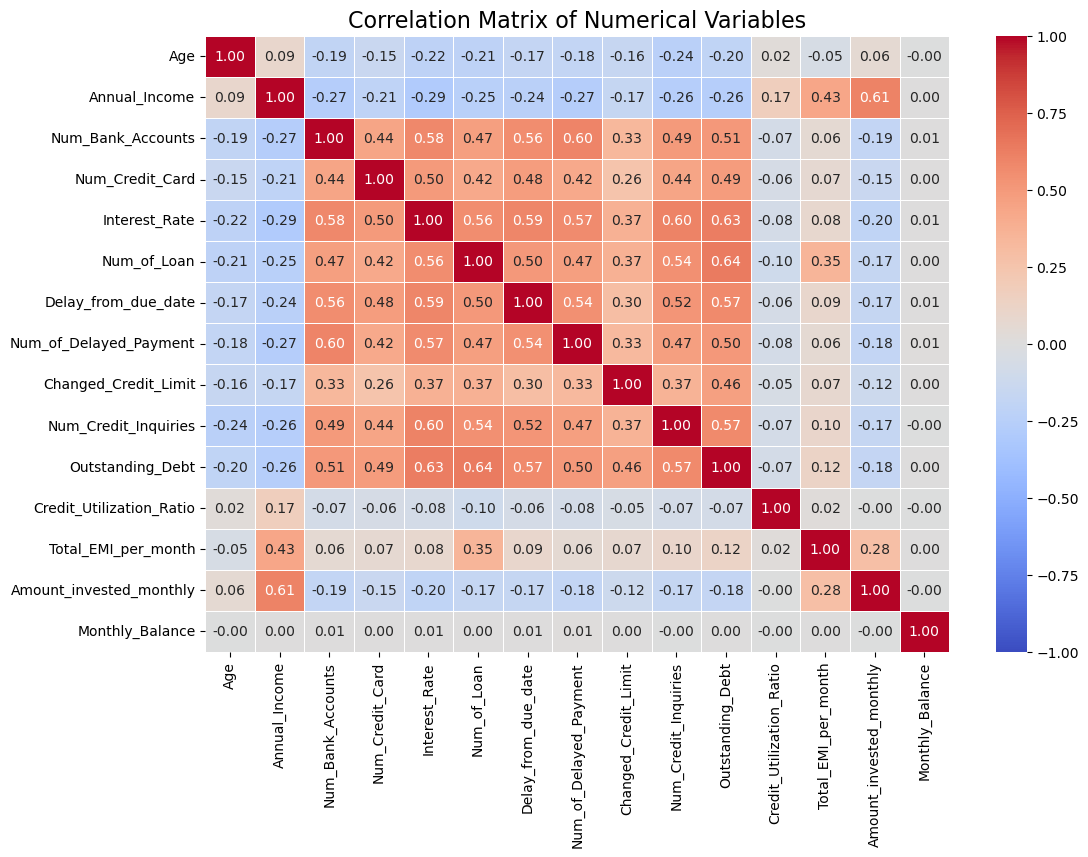

In [327]:
numerical_vars = train_df.select_dtypes(include=['int64', 'float64']).columns
# Correlation matrix 

corr_matrix = train_df[numerical_vars].corr()

plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)

# Add title
plt.title("Correlation Matrix of Numerical Variables", fontsize=16)

# Save the figure
plt.savefig('correlation_matrix.png', bbox_inches='tight')

# Show the plot
plt.show()


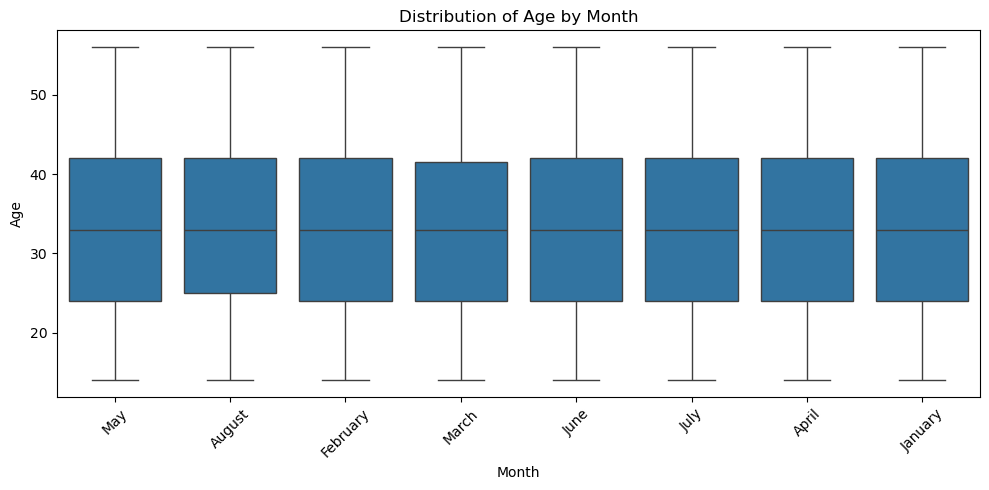

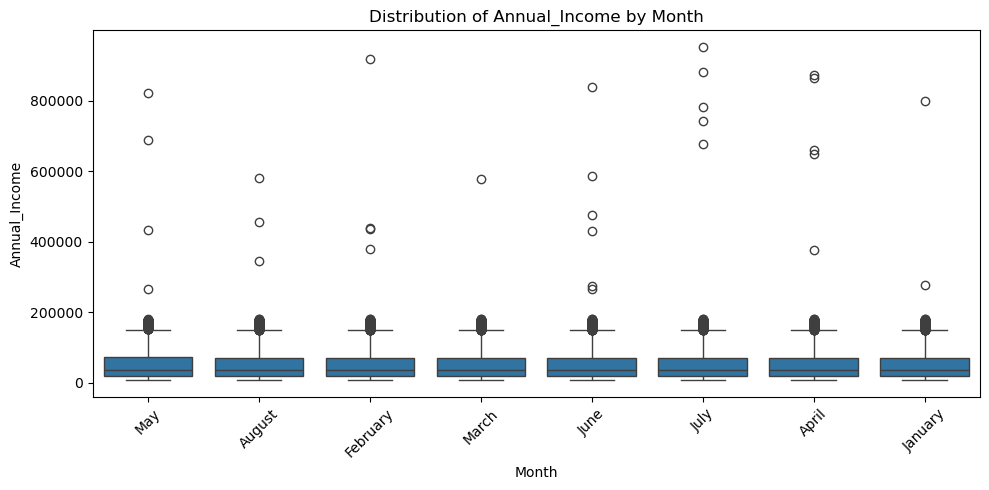

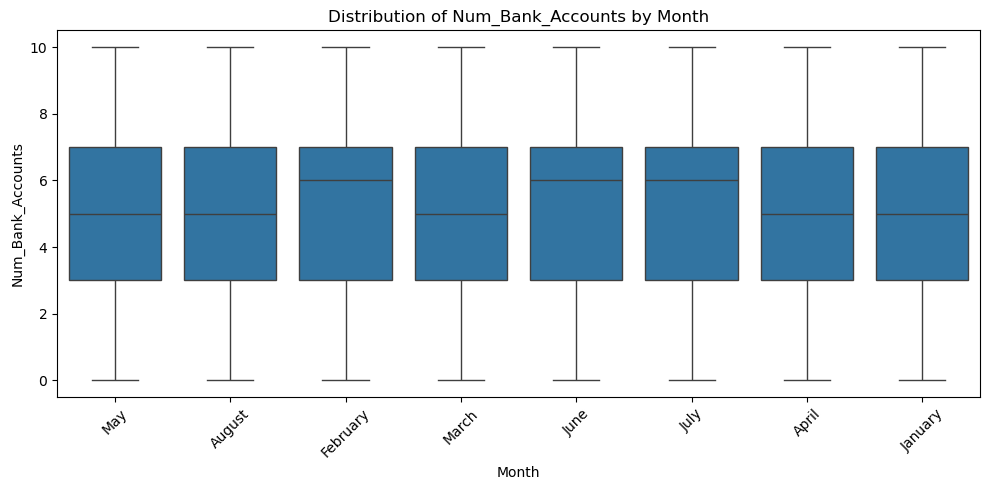

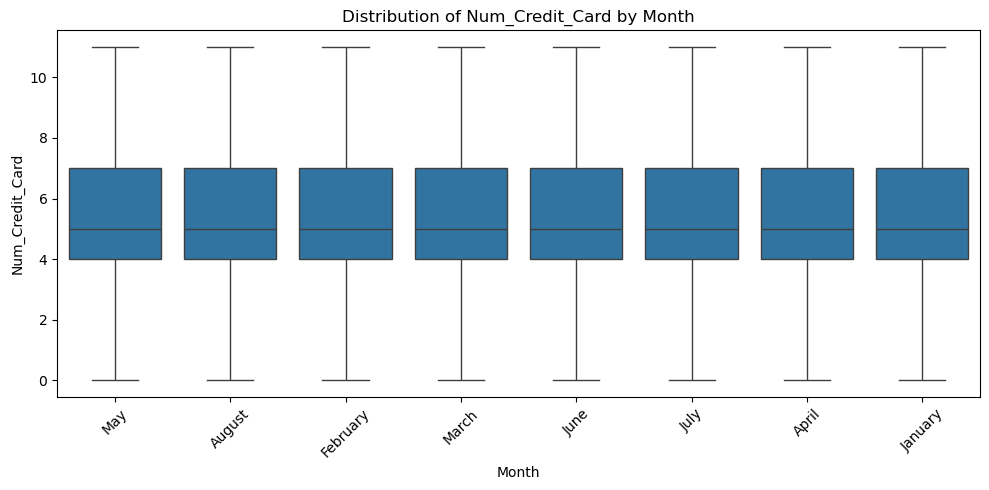

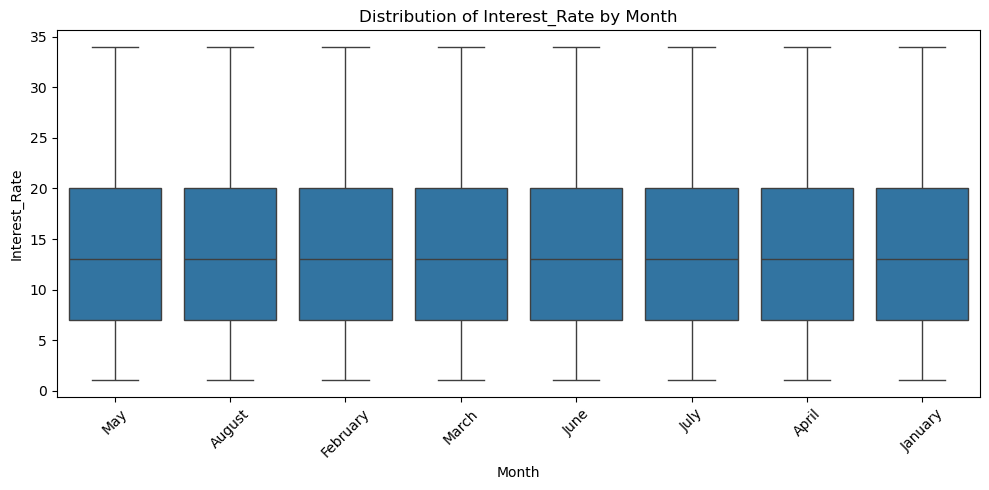

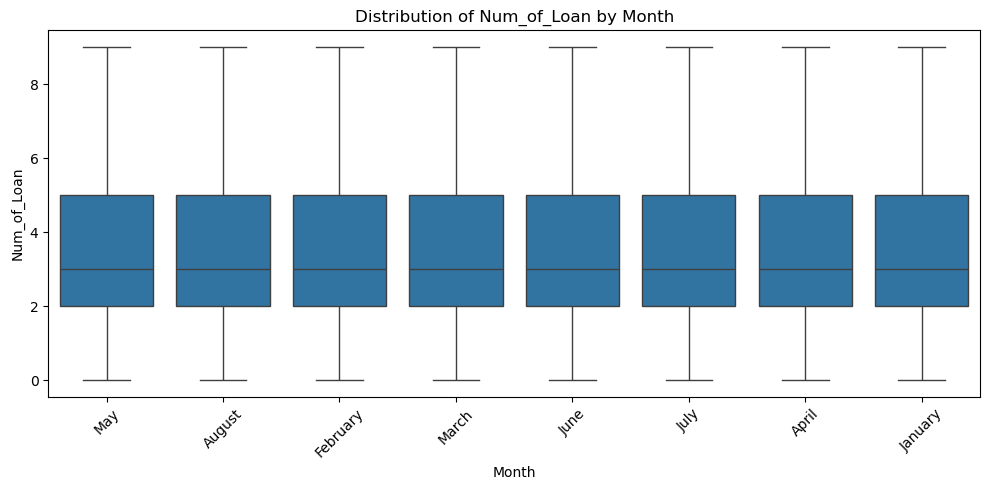

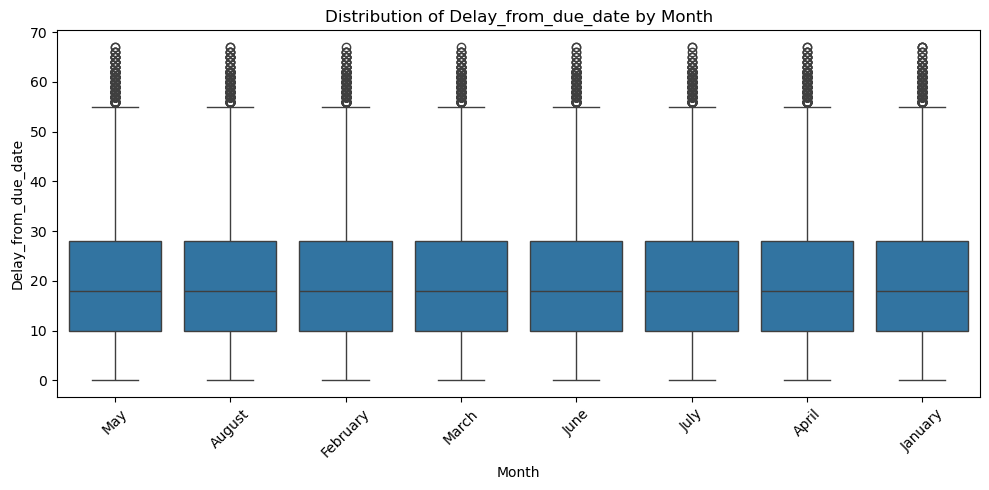

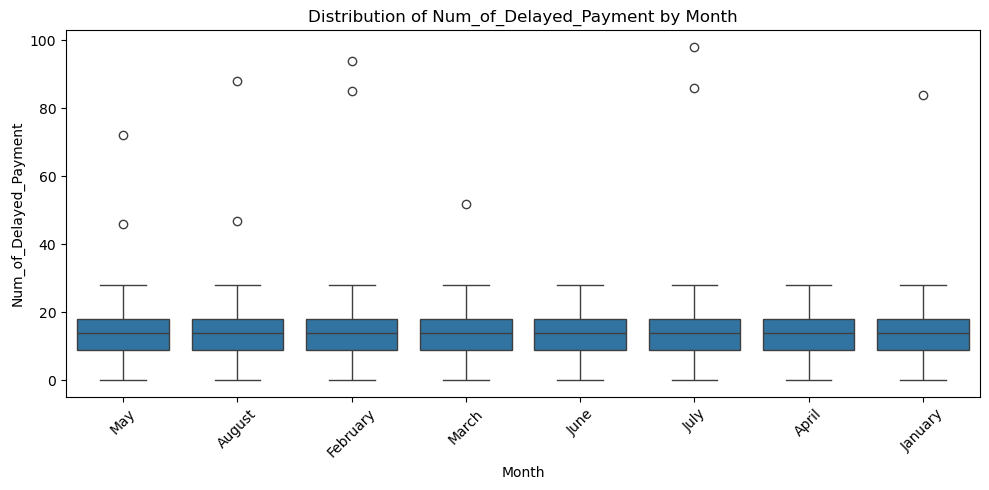

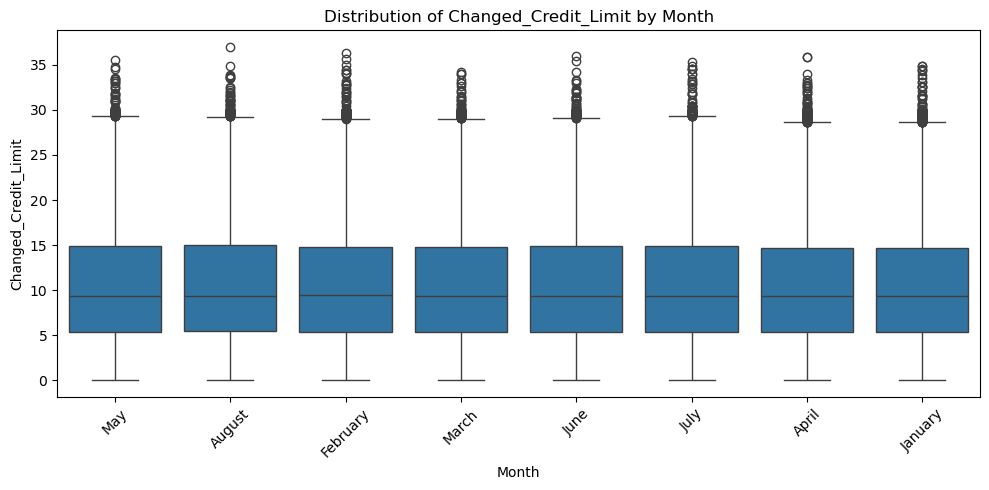

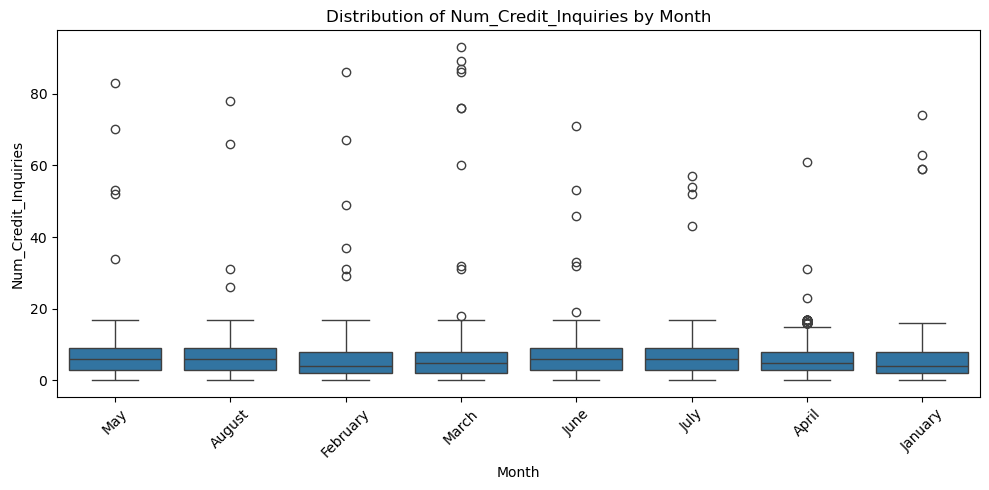

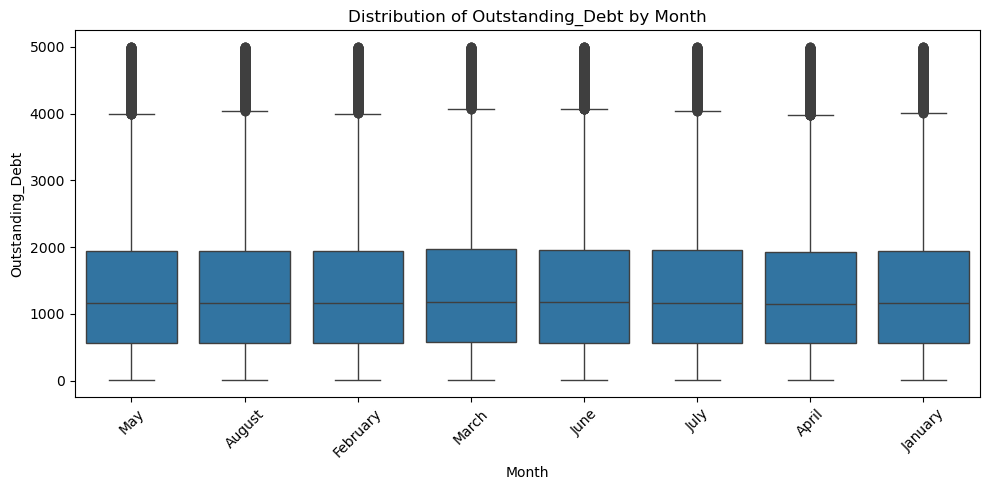

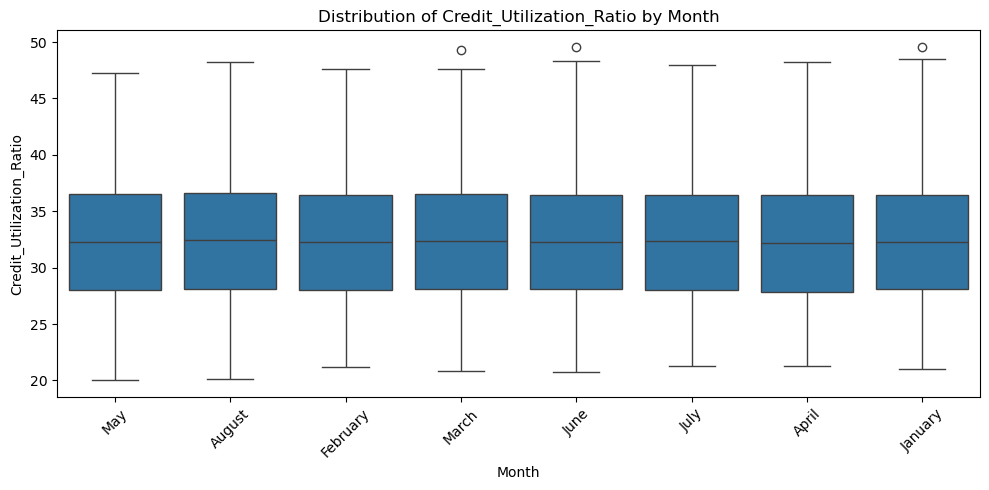

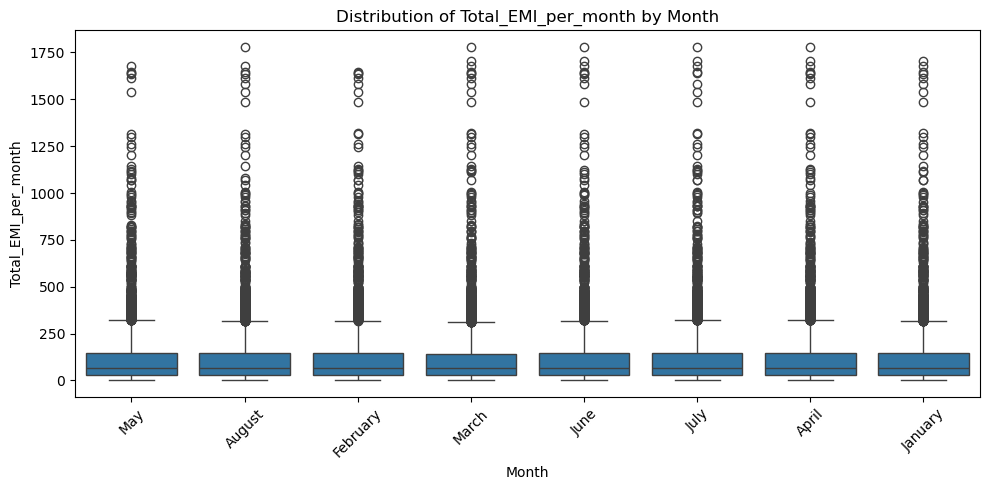

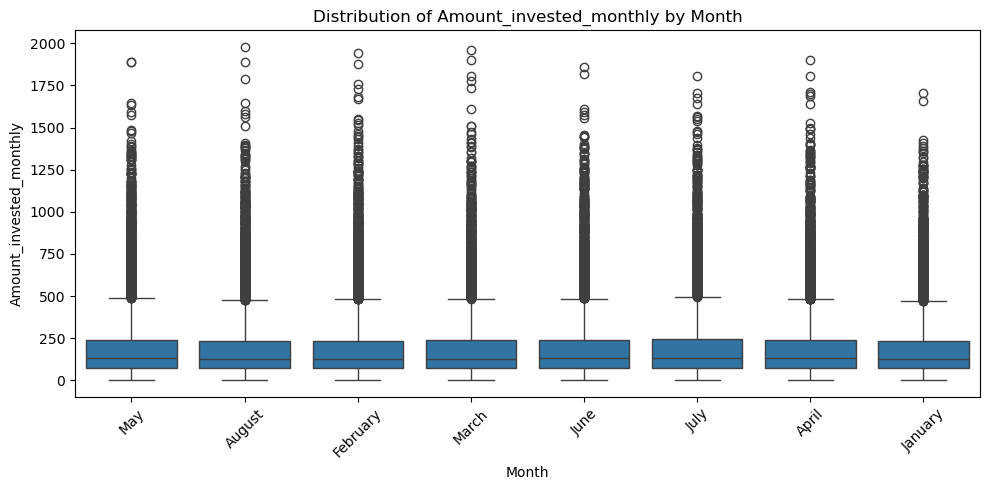

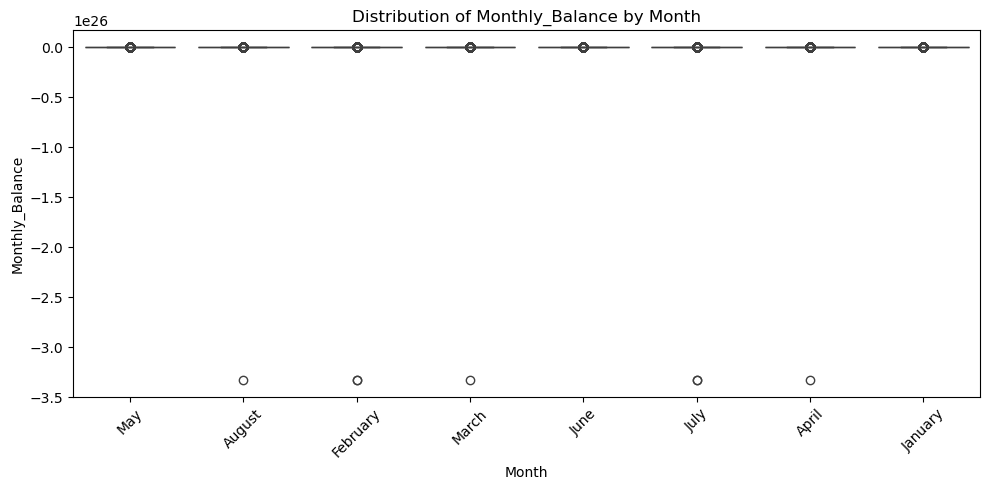

In [328]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_vars = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

for var in numerical_vars:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Month', y=var, data=train_df)
    plt.title(f'Distribution of {var} by Month')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [329]:
from scipy.stats import chi2_contingency

categorical_vars = train_df.select_dtypes(include=['object']).columns.tolist()
categorical_vars.remove('Month')  # exclude Month itself

for var in categorical_vars:
    contingency_table = pd.crosstab(train_df['Month'], train_df[var])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test between Month and {var}: p-value = {p:.4f}")
    if p < 0.05:
        print(f"  --> Significant association with Month\n")
    else:
        print(f"  --> No significant association with Month\n")


Chi-square test between Month and Occupation: p-value = 1.0000
  --> No significant association with Month

Chi-square test between Month and Credit_Mix: p-value = 0.9990
  --> No significant association with Month

Chi-square test between Month and Payment_of_Min_Amount: p-value = 0.8486
  --> No significant association with Month

Chi-square test between Month and Payment_Behaviour: p-value = 0.9161
  --> No significant association with Month

Chi-square test between Month and Credit_Score: p-value = 0.0000
  --> Significant association with Month



In [330]:
month_credit_score_counts = train_df.groupby('Month')['Credit_Score'].value_counts().unstack(fill_value=0)
print(month_credit_score_counts)


Credit_Score  Good  Poor  Standard
Month                             
April         1904  2919      5164
August        1930  2865      5230
February      1585  2846      5554
January       1587  2862      5564
July          1933  2934      5146
June          1893  2987      5155
March         1568  2848      5527
May           1862  2938      5199


In [331]:
month_counts = train_df['Month'].value_counts().sort_index()
print(month_counts)


Month
April        9987
August      10025
February     9985
January     10013
July        10013
June        10035
March        9943
May          9999
Name: count, dtype: int64


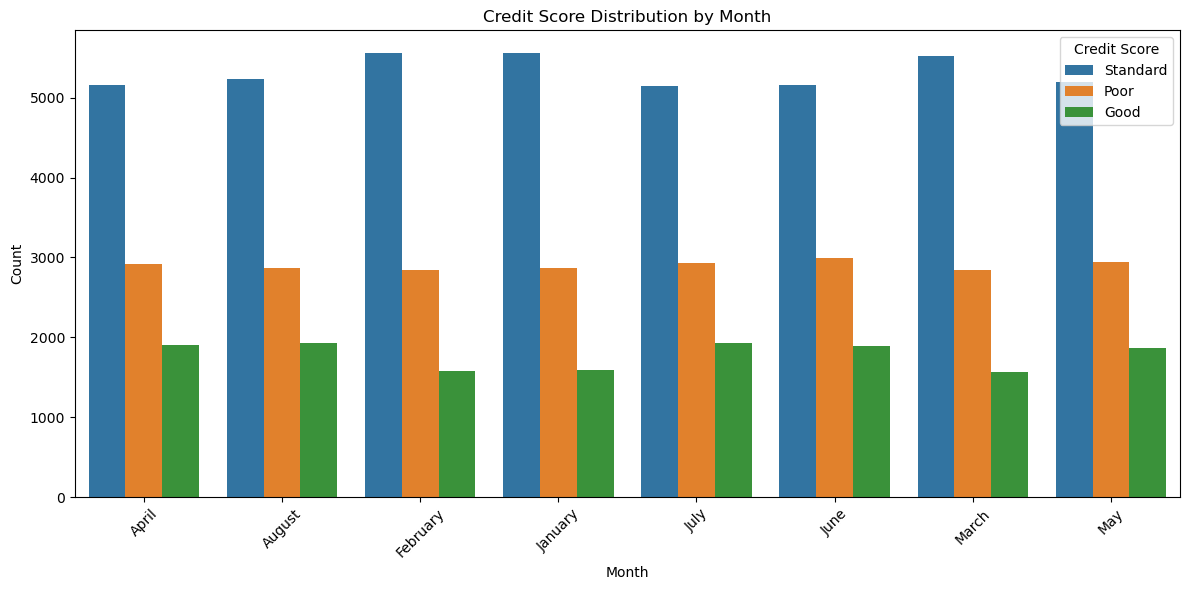

In [332]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=train_df, x='Month', hue='Credit_Score', order=sorted(train_df['Month'].unique()))
plt.title('Credit Score Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Credit Score')
plt.tight_layout()
plt.show()


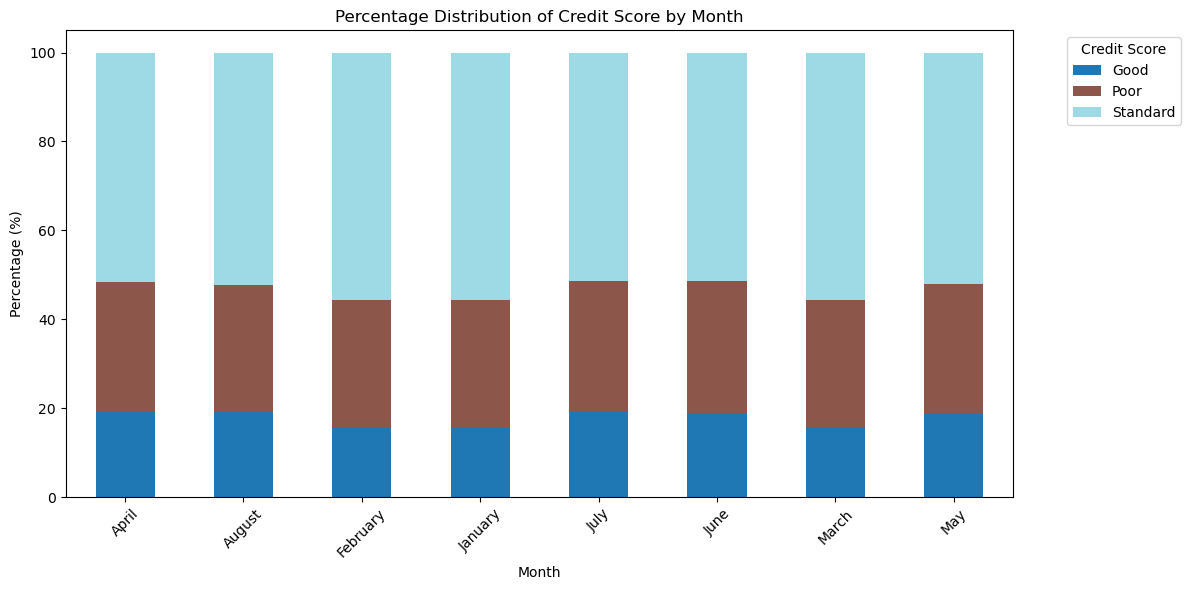

In [333]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate counts
counts = train_df.groupby(['Month', 'Credit_Score']).size().unstack(fill_value=0)

# Calculate percentage by month (row-wise percentage)
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
percentages.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

plt.title('Percentage Distribution of Credit Score by Month')
plt.ylabel('Percentage (%)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend(title='Credit Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [334]:
from scipy.stats import chi2_contingency

# Select all categorical columns except Credit_Score
categorical_vars = train_df.select_dtypes(include='object').columns.tolist()
categorical_vars.remove('Credit_Score')

# Run Chi-square test for each
for var in categorical_vars:
    contingency = pd.crosstab(train_df[var], train_df['Credit_Score'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"Chi-square test between {var} and Credit_Score: p-value = {p:.4f}")
    if p < 0.05:
        print("  --> Significant association ✅\n")
    else:
        print("  --> No significant association ❌\n")


Chi-square test between Month and Credit_Score: p-value = 0.0000
  --> Significant association ✅

Chi-square test between Occupation and Credit_Score: p-value = 0.0014
  --> Significant association ✅

Chi-square test between Credit_Mix and Credit_Score: p-value = 0.0000
  --> Significant association ✅

Chi-square test between Payment_of_Min_Amount and Credit_Score: p-value = 0.0000
  --> Significant association ✅

Chi-square test between Payment_Behaviour and Credit_Score: p-value = 0.0000
  --> Significant association ✅



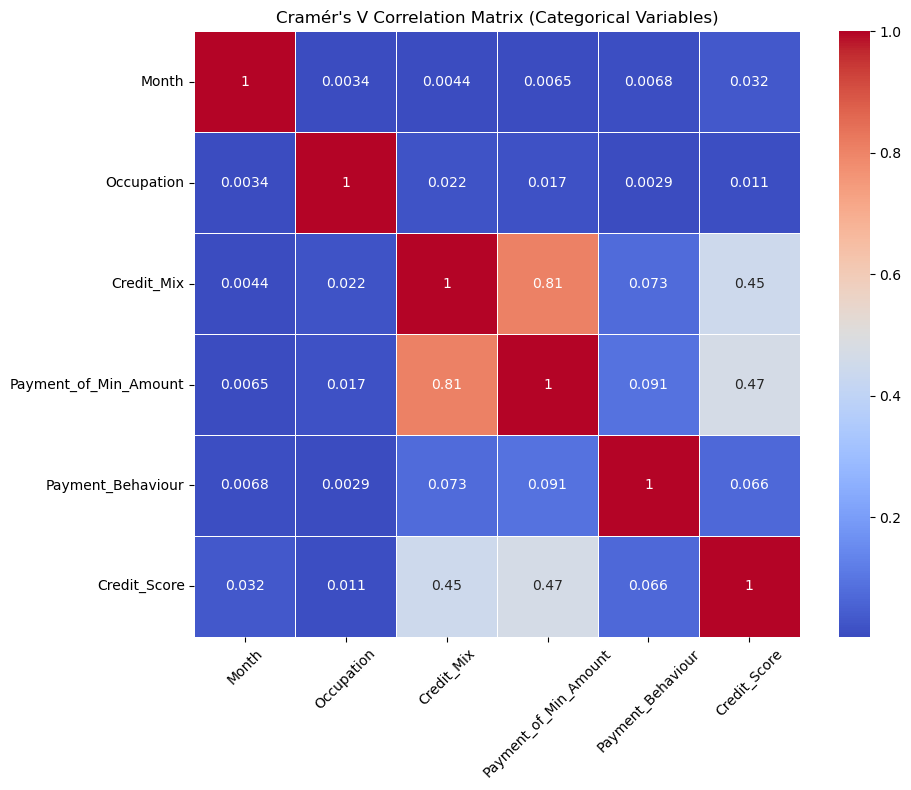

In [335]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Function to compute Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Select categorical variables
cat_vars = train_df.select_dtypes(include='object').columns.tolist()

# Initialize empty matrix
cramers_matrix = pd.DataFrame(index=cat_vars, columns=cat_vars)

# Compute pairwise Cramér’s V
for var1 in cat_vars:
    for var2 in cat_vars:
        if var1 == var2:
            cramers_matrix.loc[var1, var2] = 1.0
        else:
            v = cramers_v(train_df[var1], train_df[var2])
            cramers_matrix.loc[var1, var2] = round(v, 4)

# Convert to float
cramers_matrix = cramers_matrix.astype(float)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_matrix, annot=True, cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Cramér's V Correlation Matrix (Categorical Variables)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [336]:
#after checking cramers v values
columns_to_drop = ['Credit_Mix']
train_df.drop(columns=columns_to_drop, inplace=True)


In [337]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     80000 non-null  object 
 1   Age                       80000 non-null  int64  
 2   Occupation                80000 non-null  object 
 3   Annual_Income             80000 non-null  float64
 4   Num_Bank_Accounts         80000 non-null  float64
 5   Num_Credit_Card           80000 non-null  int64  
 6   Interest_Rate             80000 non-null  int64  
 7   Num_of_Loan               80000 non-null  int64  
 8   Delay_from_due_date       80000 non-null  float64
 9   Num_of_Delayed_Payment    80000 non-null  int64  
 10  Changed_Credit_Limit      80000 non-null  float64
 11  Num_Credit_Inquiries      80000 non-null  int64  
 12  Outstanding_Debt          80000 non-null  float64
 13  Credit_Utilization_Ratio  80000 non-null  float64
 14  Paymen

In [338]:
# Get numerical variables
numerical_vars = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove 'Credit_Score' only if it exists in the list
if 'Credit_Score' in numerical_vars:
    numerical_vars.remove('Credit_Score')


In [339]:
from scipy.stats import f_oneway

for var in numerical_vars:
    groups = [group[var].dropna() for name, group in train_df.groupby('Credit_Score')]
    if len(groups) > 1:
        stat, p = f_oneway(*groups)
        print(f"ANOVA between {var} and Credit_Score: p-value = {p:.4f}")
        if p < 0.05:
            print("  --> Significant difference ✅\n")
        else:
            print("  --> No significant difference ❌\n")


ANOVA between Age and Credit_Score: p-value = 0.0000
  --> Significant difference ✅

ANOVA between Annual_Income and Credit_Score: p-value = 0.0000
  --> Significant difference ✅

ANOVA between Num_Bank_Accounts and Credit_Score: p-value = 0.0000
  --> Significant difference ✅

ANOVA between Num_Credit_Card and Credit_Score: p-value = 0.0000
  --> Significant difference ✅

ANOVA between Interest_Rate and Credit_Score: p-value = 0.0000
  --> Significant difference ✅

ANOVA between Num_of_Loan and Credit_Score: p-value = 0.0000
  --> Significant difference ✅

ANOVA between Delay_from_due_date and Credit_Score: p-value = 0.0000
  --> Significant difference ✅

ANOVA between Num_of_Delayed_Payment and Credit_Score: p-value = 0.0000
  --> Significant difference ✅

ANOVA between Changed_Credit_Limit and Credit_Score: p-value = 0.0000
  --> Significant difference ✅

ANOVA between Num_Credit_Inquiries and Credit_Score: p-value = 0.0000
  --> Significant difference ✅

ANOVA between Outstanding_D

In [340]:
#remove monthly balance
columns_to_drop = ['Monthly_Balance']
train_df.drop(columns=columns_to_drop, inplace=True)

In [341]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     80000 non-null  object 
 1   Age                       80000 non-null  int64  
 2   Occupation                80000 non-null  object 
 3   Annual_Income             80000 non-null  float64
 4   Num_Bank_Accounts         80000 non-null  float64
 5   Num_Credit_Card           80000 non-null  int64  
 6   Interest_Rate             80000 non-null  int64  
 7   Num_of_Loan               80000 non-null  int64  
 8   Delay_from_due_date       80000 non-null  float64
 9   Num_of_Delayed_Payment    80000 non-null  int64  
 10  Changed_Credit_Limit      80000 non-null  float64
 11  Num_Credit_Inquiries      80000 non-null  int64  
 12  Outstanding_Debt          80000 non-null  float64
 13  Credit_Utilization_Ratio  80000 non-null  float64
 14  Paymen

In [342]:
# Get numerical columns
numerical_vars = train_df.select_dtypes(include=['int64', 'float64']).columns

# Function to count outliers based on IQR
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return len(outliers)

# Apply to all numerical variables
outlier_summary = {}
for col in numerical_vars:
    outlier_count = count_outliers(train_df[col])
    outlier_summary[col] = outlier_count

# Display result
import pandas as pd
outlier_df = pd.DataFrame(list(outlier_summary.items()), columns=['Variable', 'Outlier_Count'])
outlier_df.sort_values(by='Outlier_Count', ascending=False, inplace=True)
print(outlier_df)


                    Variable  Outlier_Count
13   Amount_invested_monthly           6403
10          Outstanding_Debt           4230
12       Total_EMI_per_month           4055
6        Delay_from_due_date           3185
1              Annual_Income           1608
9       Num_Credit_Inquiries            658
8       Changed_Credit_Limit            645
7     Num_of_Delayed_Payment             10
11  Credit_Utilization_Ratio              3
0                        Age              0
2          Num_Bank_Accounts              0
3            Num_Credit_Card              0
4              Interest_Rate              0
5                Num_of_Loan              0


In [343]:
# Get the count of unique values for each column in the train dataset
for column in train_df.columns:
    num_unique = train_df[column].nunique()
    print(f"Number of unique values for '{column}': {num_unique}")
    print('-' * 40)


Number of unique values for 'Month': 8
----------------------------------------
Number of unique values for 'Age': 43
----------------------------------------
Number of unique values for 'Occupation': 3
----------------------------------------
Number of unique values for 'Annual_Income': 12561
----------------------------------------
Number of unique values for 'Num_Bank_Accounts': 11
----------------------------------------
Number of unique values for 'Num_Credit_Card': 12
----------------------------------------
Number of unique values for 'Interest_Rate': 34
----------------------------------------
Number of unique values for 'Num_of_Loan': 10
----------------------------------------
Number of unique values for 'Delay_from_due_date': 68
----------------------------------------
Number of unique values for 'Num_of_Delayed_Payment': 39
----------------------------------------
Number of unique values for 'Changed_Credit_Limit': 4470
----------------------------------------
Number of uni

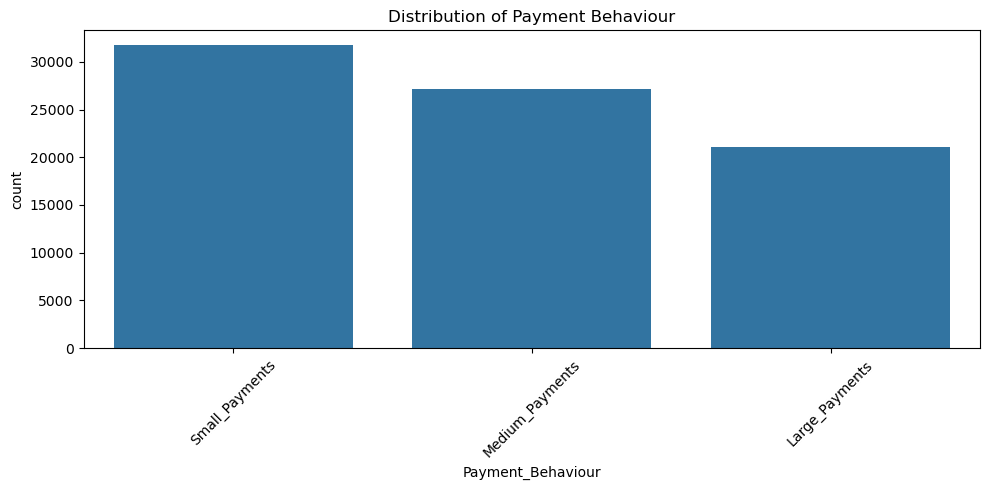

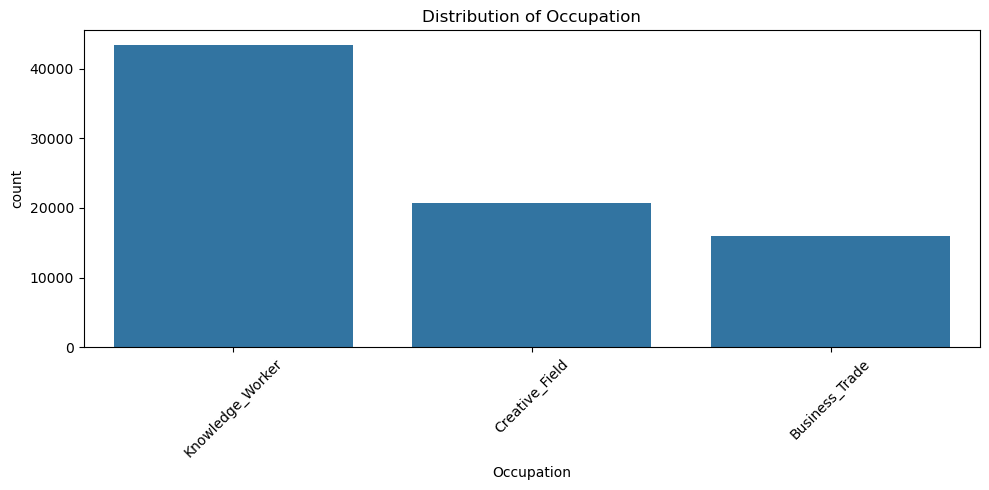

Payment_Behaviour Value Counts:
Payment_Behaviour
Small_Payments     31708
Medium_Payments    27176
Large_Payments     21116
Name: count, dtype: int64

Occupation Value Counts:
Occupation
Knowledge_Worker    43352
Creative_Field      20748
Business_Trade      15900
Name: count, dtype: int64


In [344]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for Payment_Behaviour
plt.figure(figsize=(10, 5))
sns.countplot(data=train_df, x='Payment_Behaviour', order=train_df['Payment_Behaviour'].value_counts().index)
plt.title('Distribution of Payment Behaviour')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Countplot for Occupation
plt.figure(figsize=(10, 5))
sns.countplot(data=train_df, x='Occupation', order=train_df['Occupation'].value_counts().index)
plt.title('Distribution of Occupation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Value counts for Payment_Behaviour
payment_behaviour_counts = train_df['Payment_Behaviour'].value_counts()
print("Payment_Behaviour Value Counts:")
print(payment_behaviour_counts)

# Value counts for Occupation
occupation_counts = train_df['Occupation'].value_counts()
print("\nOccupation Value Counts:")
print(occupation_counts)


In [345]:
import pandas as pd

def calculate_outlier_percentages(df, columns):
    outlier_percentages = {}

    for col in columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Count outliers
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            percentage = (len(outliers) / len(df)) * 100
            outlier_percentages[col] = round(percentage, 2)

    return pd.DataFrame.from_dict(outlier_percentages, orient='index', columns=['%_Outliers'])

# Example usage on all numerical columns:
numeric_cols = train_df.select_dtypes(include='number').columns
outlier_report = calculate_outlier_percentages(train_df, numeric_cols)

print(outlier_report.sort_values('%_Outliers', ascending=False))


                          %_Outliers
Amount_invested_monthly         8.00
Outstanding_Debt                5.29
Total_EMI_per_month             5.07
Delay_from_due_date             3.98
Annual_Income                   2.01
Num_Credit_Inquiries            0.82
Changed_Credit_Limit            0.81
Num_of_Delayed_Payment          0.01
Age                             0.00
Num_Bank_Accounts               0.00
Num_Credit_Card                 0.00
Interest_Rate                   0.00
Num_of_Loan                     0.00
Credit_Utilization_Ratio        0.00


In [346]:
##in advance analysis we need to try to handle outliers (applying transformations)

C:\Users\Hiruni\AppData\Local\Temp\ipykernel_8964\779817689.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=percent_df, x=column, y='Percentage', palette='Set2')


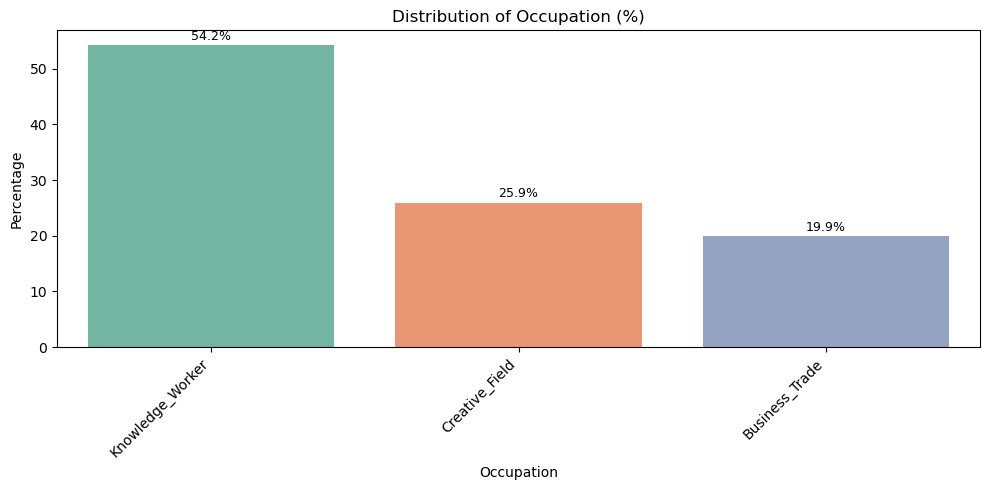

C:\Users\Hiruni\AppData\Local\Temp\ipykernel_8964\779817689.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=percent_df, x=column, y='Percentage', palette='Set2')


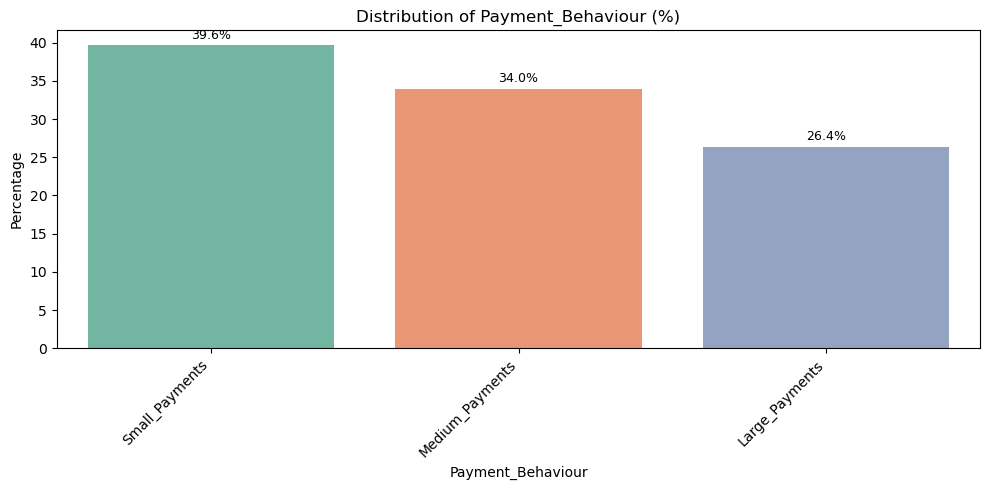

C:\Users\Hiruni\AppData\Local\Temp\ipykernel_8964\779817689.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=percent_df, x=column, y='Percentage', palette='Set2')


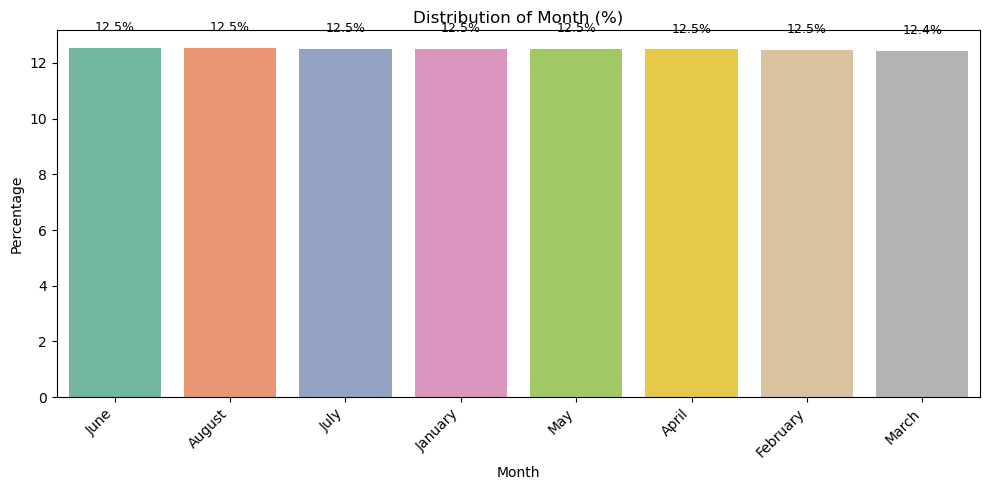

C:\Users\Hiruni\AppData\Local\Temp\ipykernel_8964\779817689.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=percent_df, x=column, y='Percentage', palette='Set2')


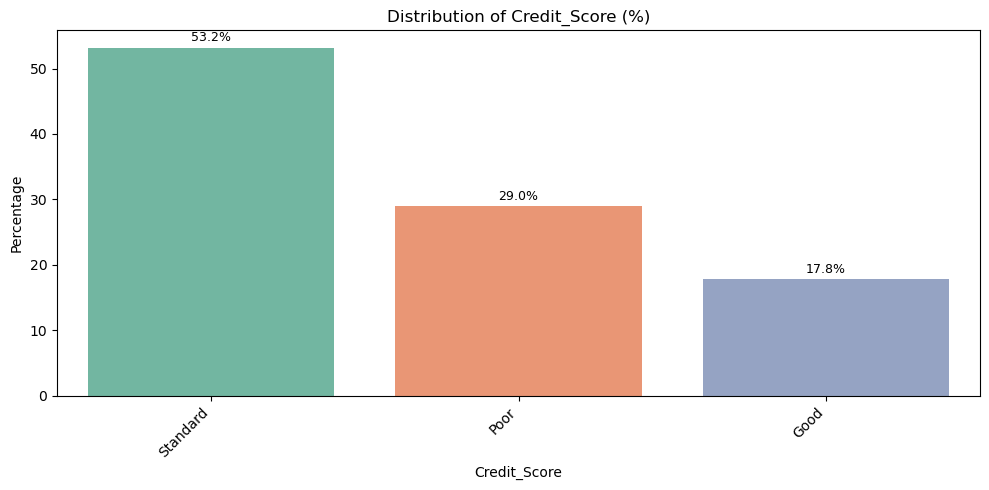

C:\Users\Hiruni\AppData\Local\Temp\ipykernel_8964\779817689.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=percent_df, x=column, y='Percentage', palette='Set2')


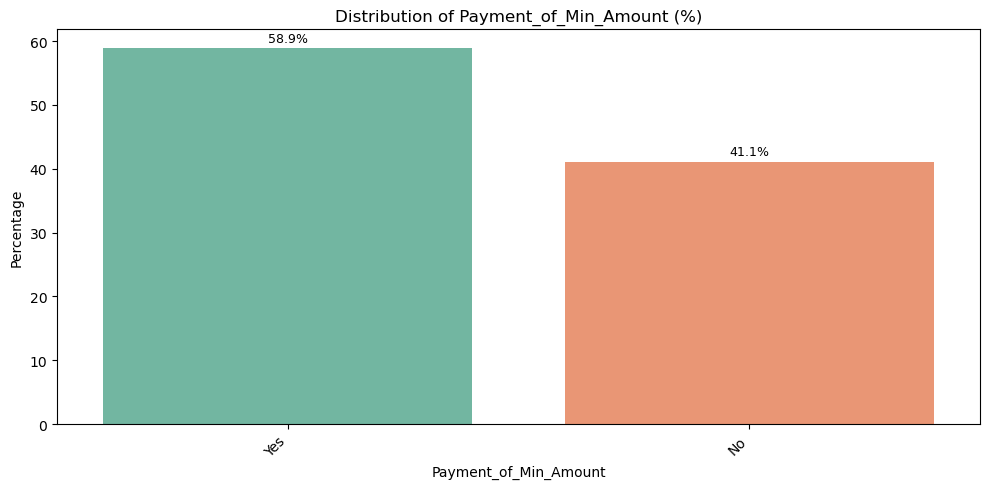

In [347]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_percentage_bar(df, column, figsize=(10,5), rotate_xticks=True):
    # Calculate percentage values
    percent_series = df[column].value_counts(normalize=True) * 100
    percent_df = percent_series.reset_index()
    percent_df.columns = [column, 'Percentage']

    # Plot
    plt.figure(figsize=figsize)
    sns.barplot(data=percent_df, x=column, y='Percentage', palette='Set2')

    # Add percentage labels on bars
    for index, row in percent_df.iterrows():
        plt.text(index, row['Percentage'] + 0.5, f"{row['Percentage']:.1f}%", 
                 ha='center', va='bottom', fontsize=9)

    plt.title(f'Distribution of {column} (%)')
    if rotate_xticks:
        plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Example usage for your dataset:
plot_percentage_bar(train_df, 'Occupation')
plot_percentage_bar(train_df, 'Payment_Behaviour')
plot_percentage_bar(train_df, 'Month')
plot_percentage_bar(train_df, 'Credit_Score')
plot_percentage_bar(train_df, 'Payment_of_Min_Amount')

In [348]:
# Set your target variable here
target = 'Credit_Score'  # <-- Change to your actual response variable

# Select all categorical variables except the target
cat_cols = train_df.select_dtypes(include='object').columns
cat_cols = [col for col in cat_cols if col != target]


In [349]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_bivariate_stacked_bar(data, cat_col, target_col, target_order=None, colors=None, figsize=(10,6)):
    # Ensure target column is categorical with the right order
    if target_order:
        data[target_col] = pd.Categorical(data[target_col], categories=target_order, ordered=True)
    
    # Calculate normalized crosstab (percentages row-wise)
    prop_df = pd.crosstab(data[cat_col], data[target_col], normalize='index') * 100
    prop_df = prop_df[target_order]  # reorder columns if target_order specified
    prop_df = prop_df.round(2)

    # Plot stacked bar chart
    ax = prop_df.plot(kind='bar', stacked=True, figsize=figsize, color=colors, edgecolor='black')

    # Add percentage labels inside bars
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height > 3:  # Only label if segment > 3% to reduce clutter
                ax.text(
                    bar.get_x() + bar.get_width() / 2,
                    bar.get_y() + height / 2,
                    f'{height:.1f}%',
                    ha='center', va='center',
                    fontsize=9,
                    color='black'
                )

    plt.title(f'{cat_col} vs {target_col}')
    plt.ylabel('Percentage (%)')
    plt.xlabel(cat_col)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title=target_col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Define your target order and colors
target_order = ['Good', 'Standard', 'Poor']
colors = ['#4CAF50', '#FFC107', '#F44336']  # Green, Amber, Red




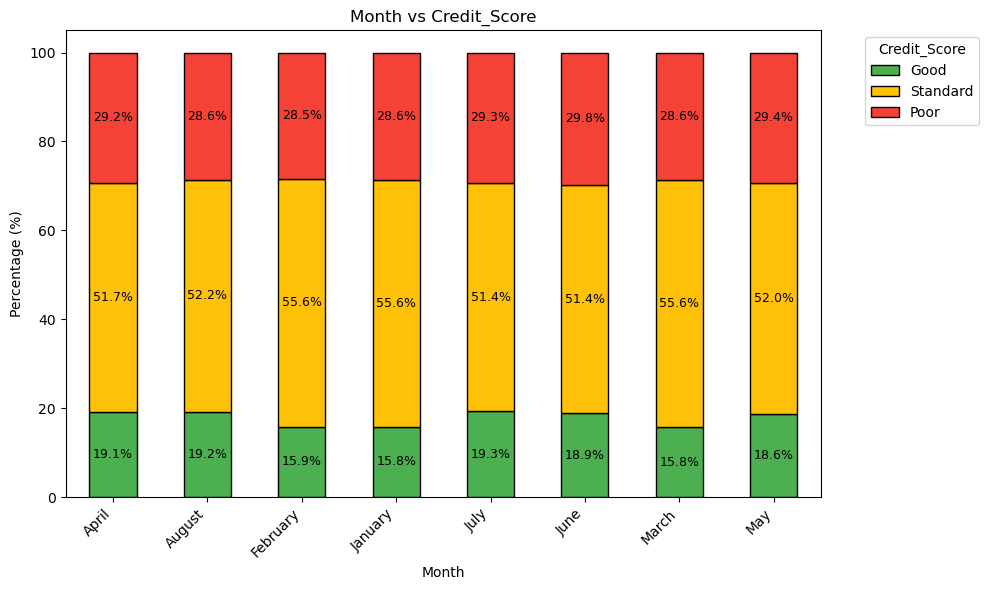

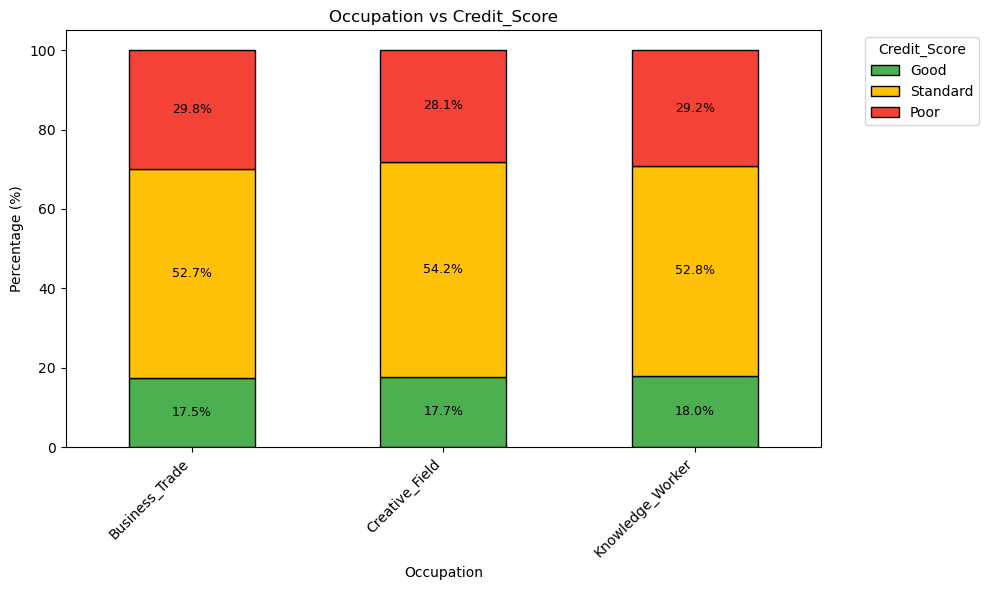

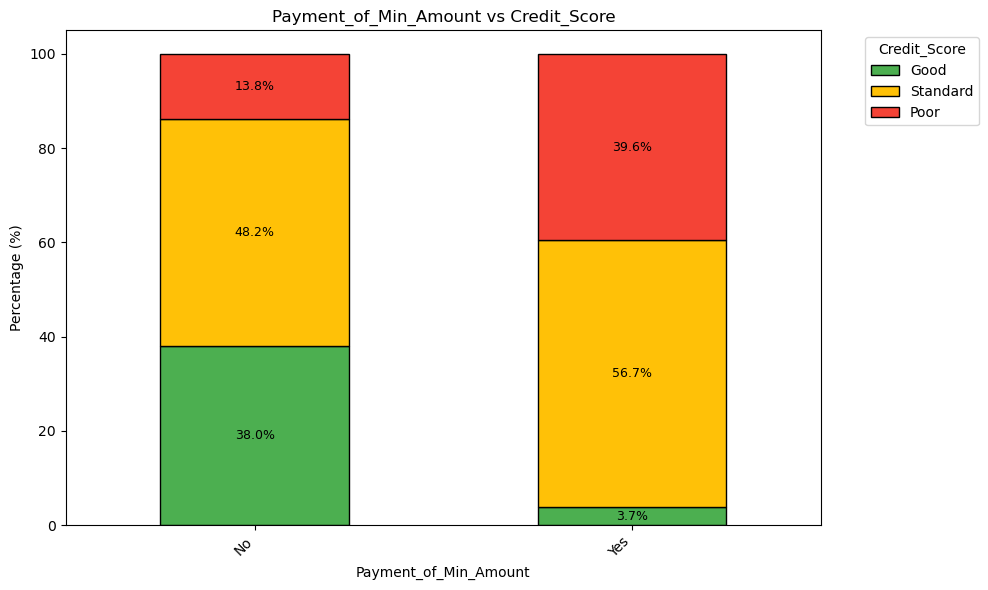

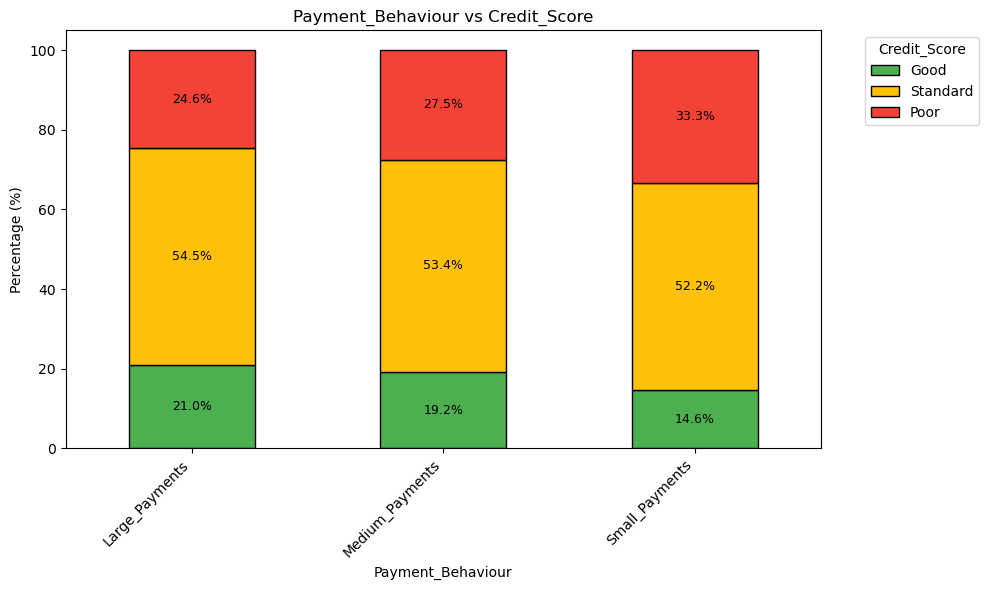

In [350]:


for col in cat_cols:
    plot_bivariate_stacked_bar(train_df, col, target_col, target_order=target_order, colors=colors)


Summary Statistics for Numerical Variables:
                            count          mean           std      min  \
Age                       80000.0     33.265912     10.764051    14.00   
Annual_Income             80000.0  50632.588103  39898.570898  7005.93   
Num_Bank_Accounts         80000.0      5.371437      2.591637     0.00   
Num_Credit_Card           80000.0      5.529813      2.069237     0.00   
Interest_Rate             80000.0     14.544512      8.738753     1.00   
Num_of_Loan               80000.0      3.530362      2.448413     0.00   
Delay_from_due_date       80000.0     21.105587     14.820942     0.00   
Num_of_Delayed_Payment    80000.0     13.349800      6.307209     0.00   
Changed_Credit_Limit      80000.0     10.482539      6.647064     0.00   
Num_Credit_Inquiries      80000.0      5.802700      4.048833     0.00   
Outstanding_Debt          80000.0   1426.142508   1157.126092     0.23   
Credit_Utilization_Ratio  80000.0     32.273436      5.116887    20.

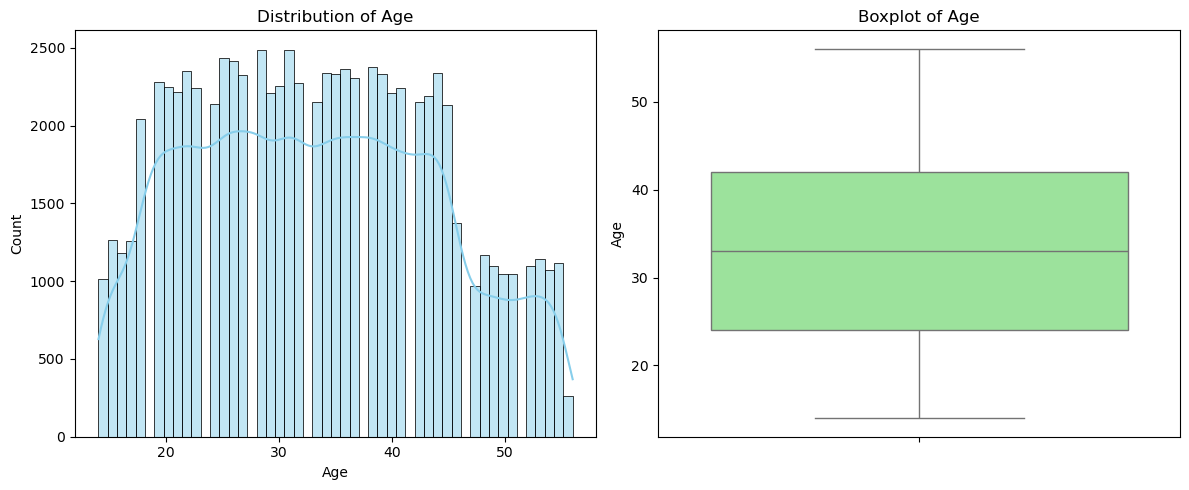

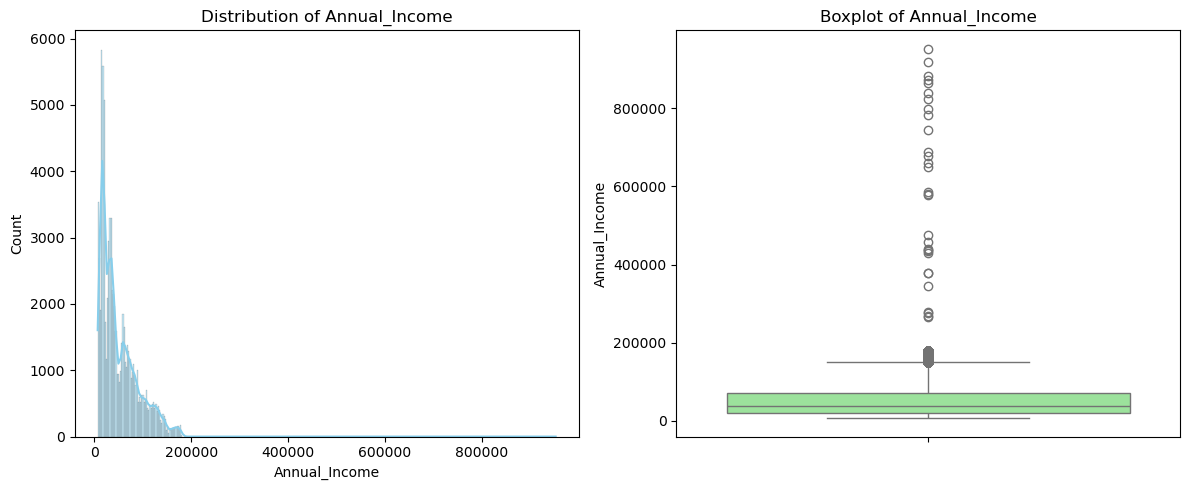

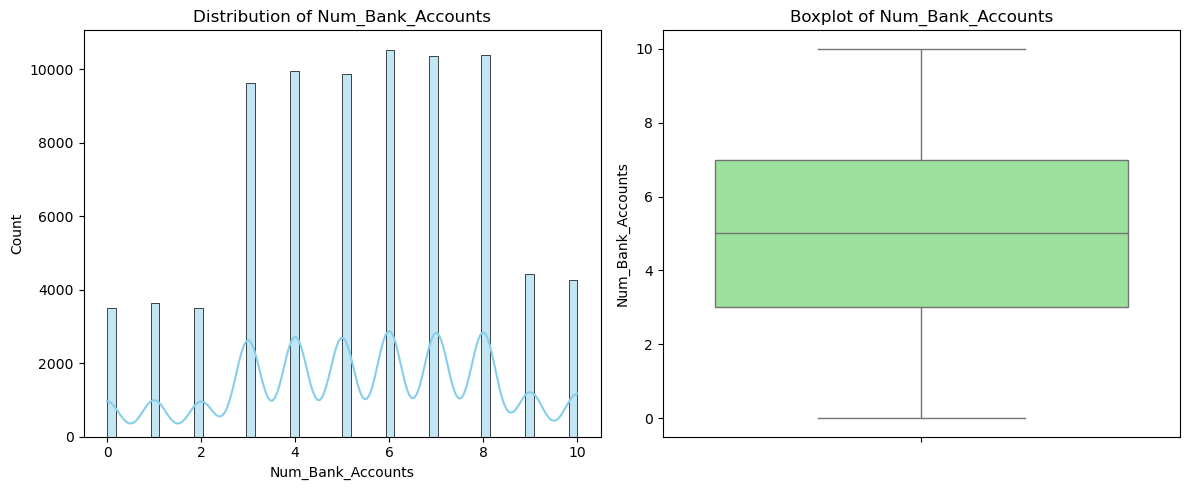

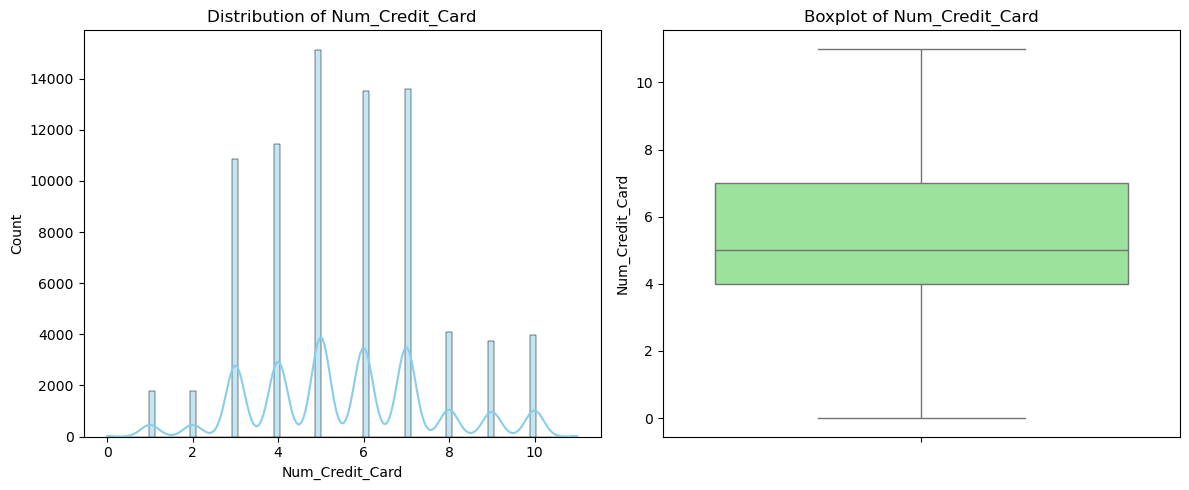

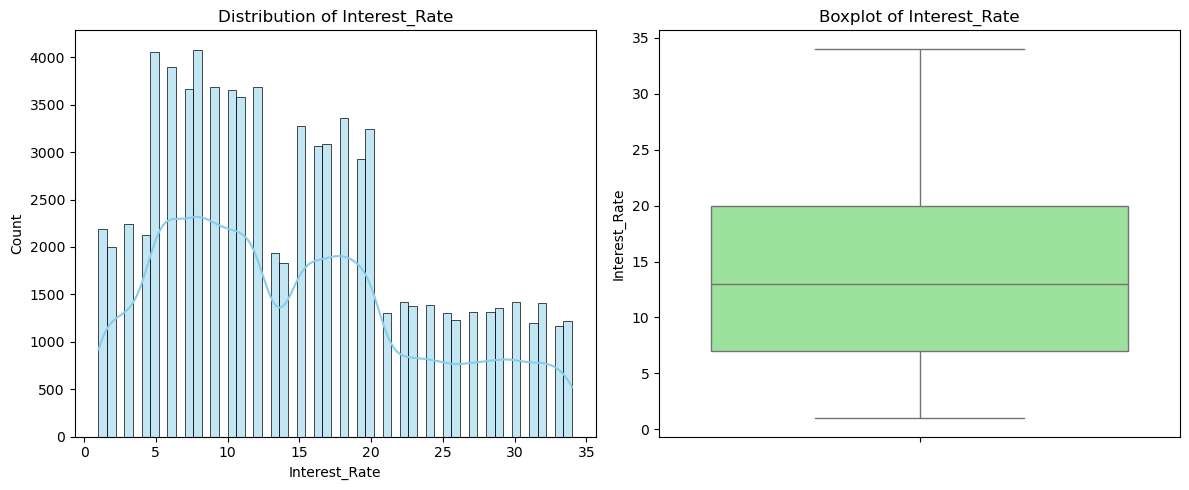

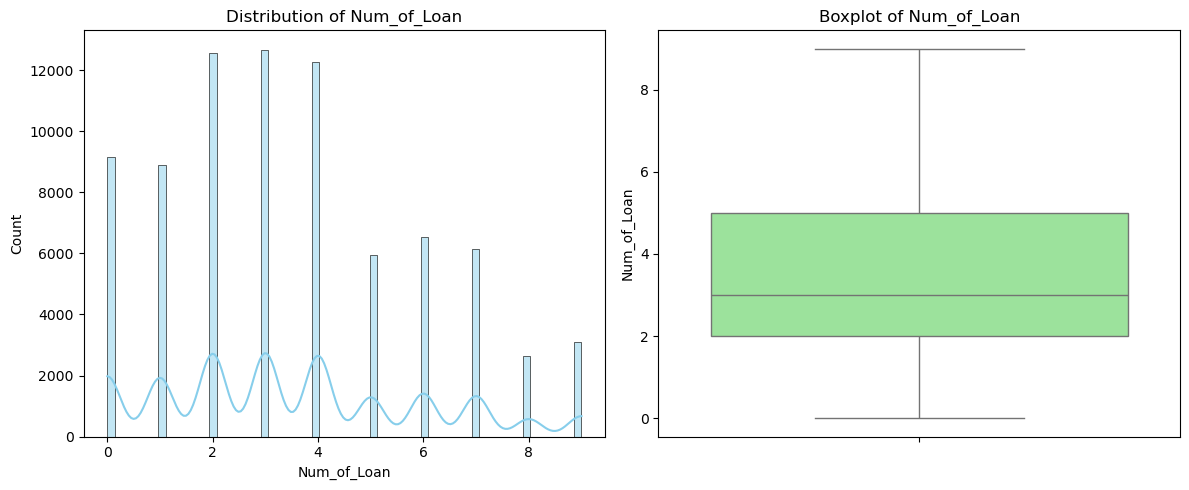

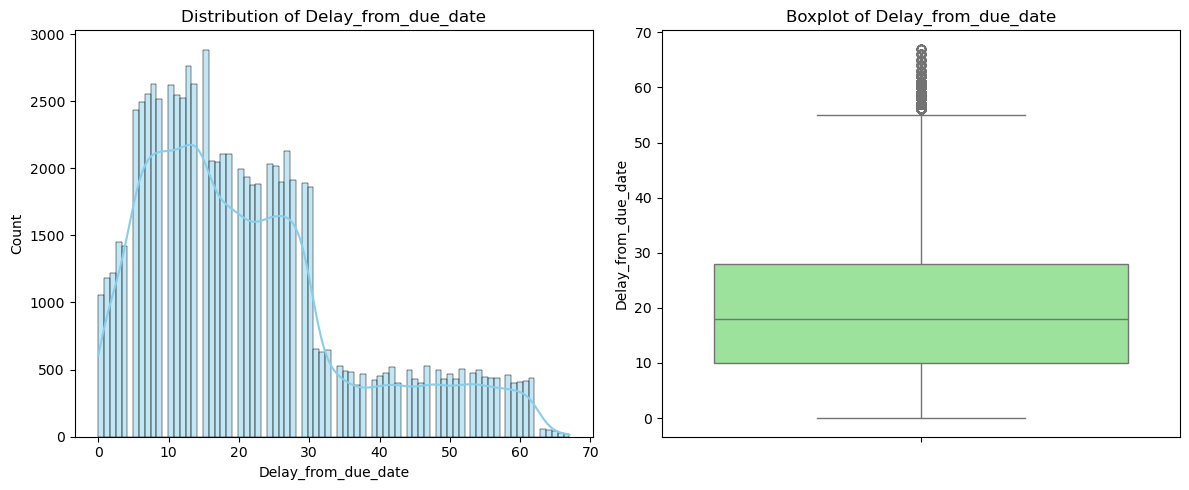

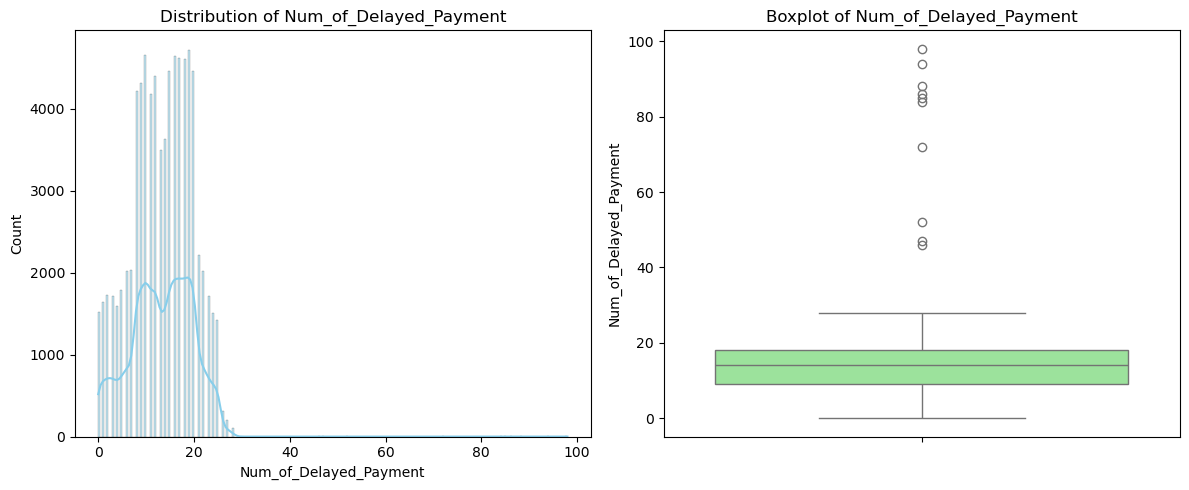

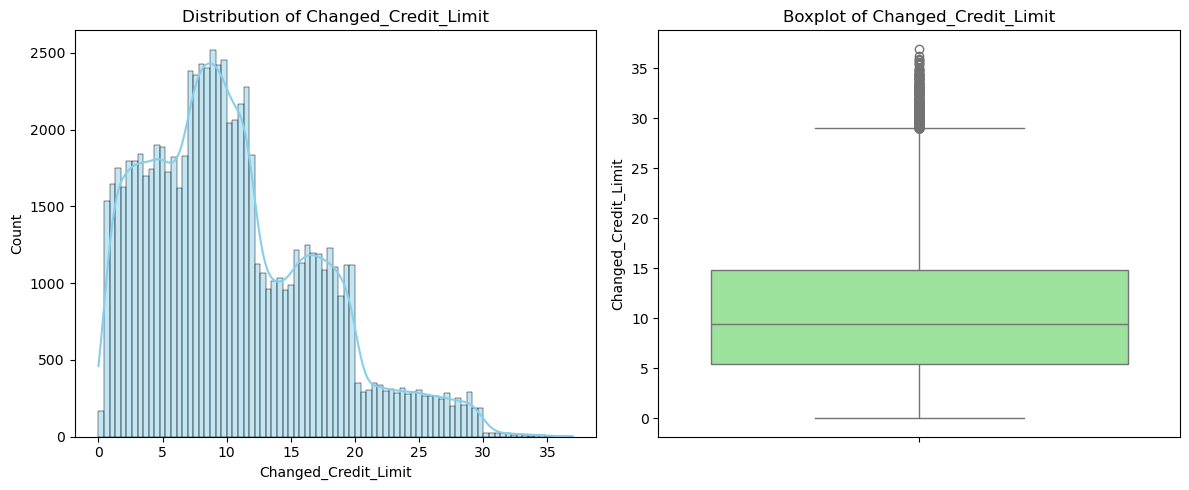

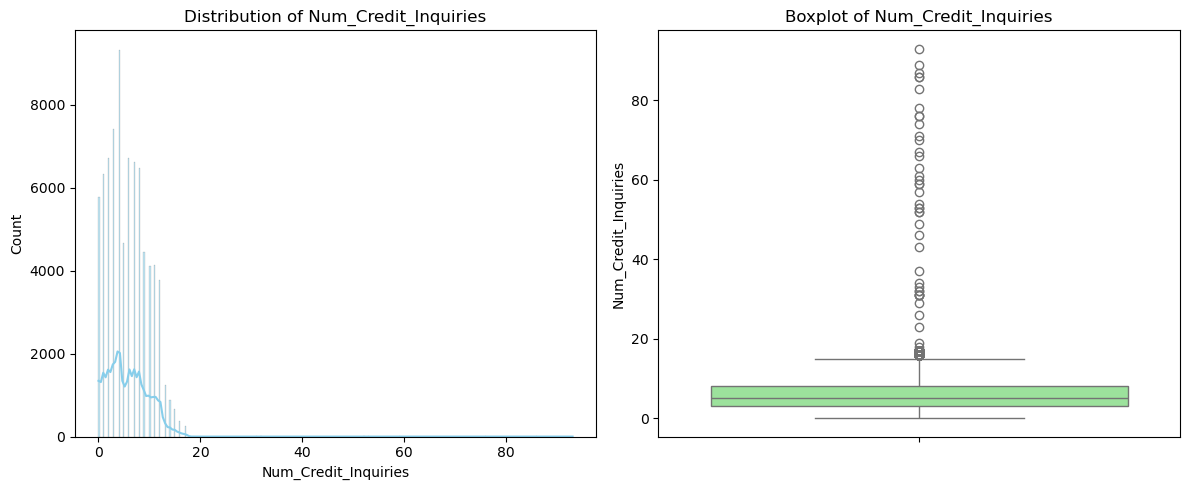

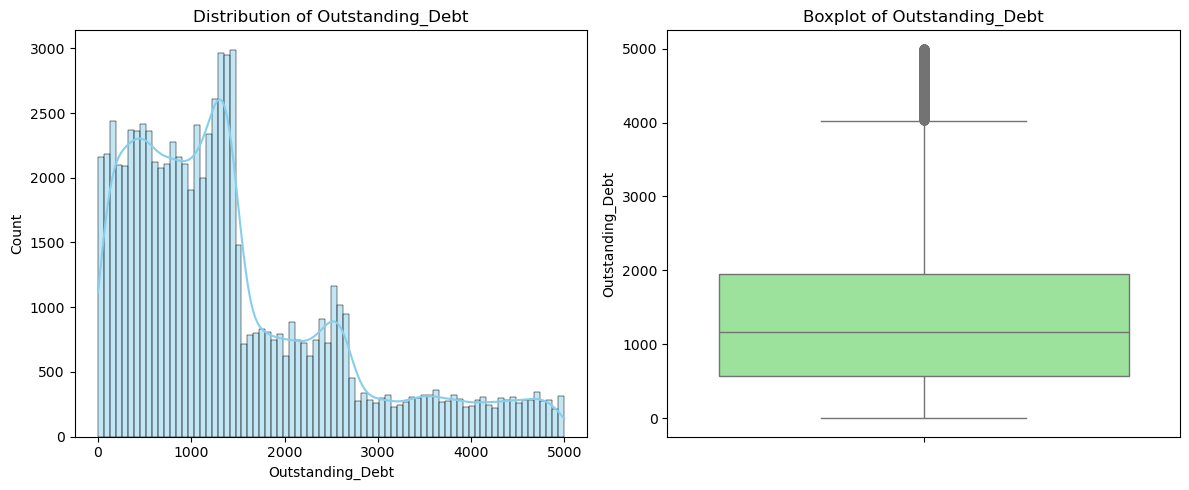

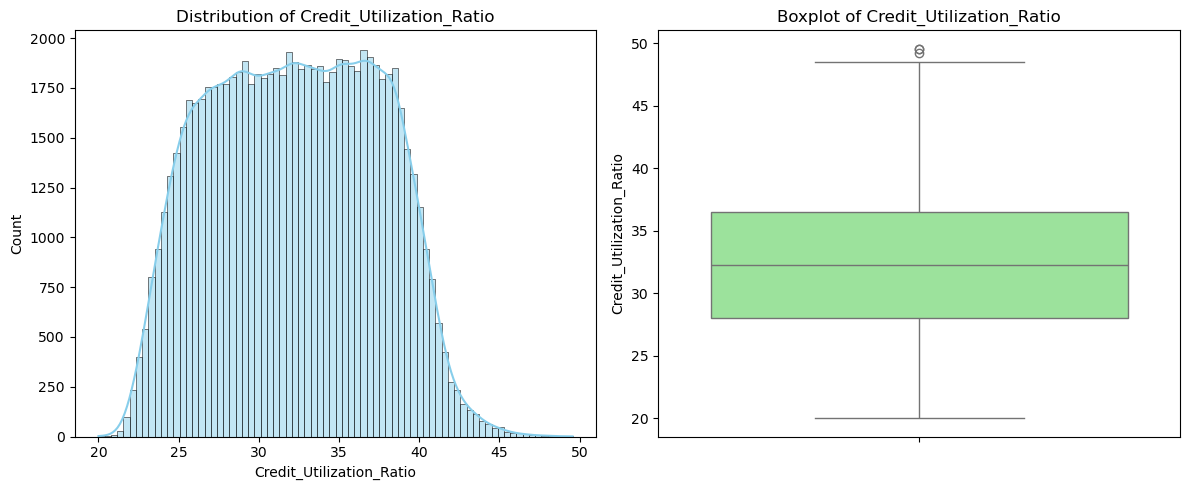

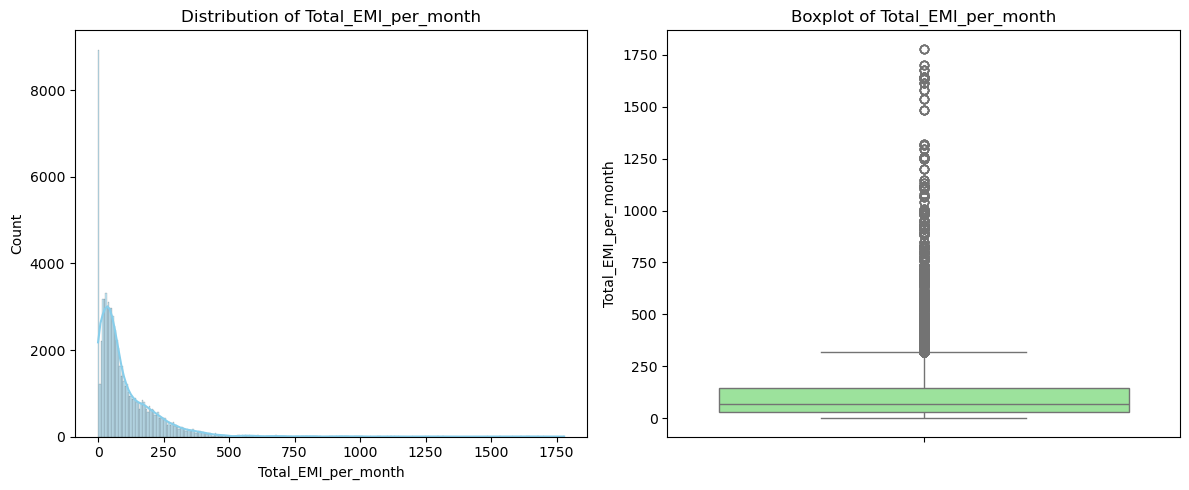

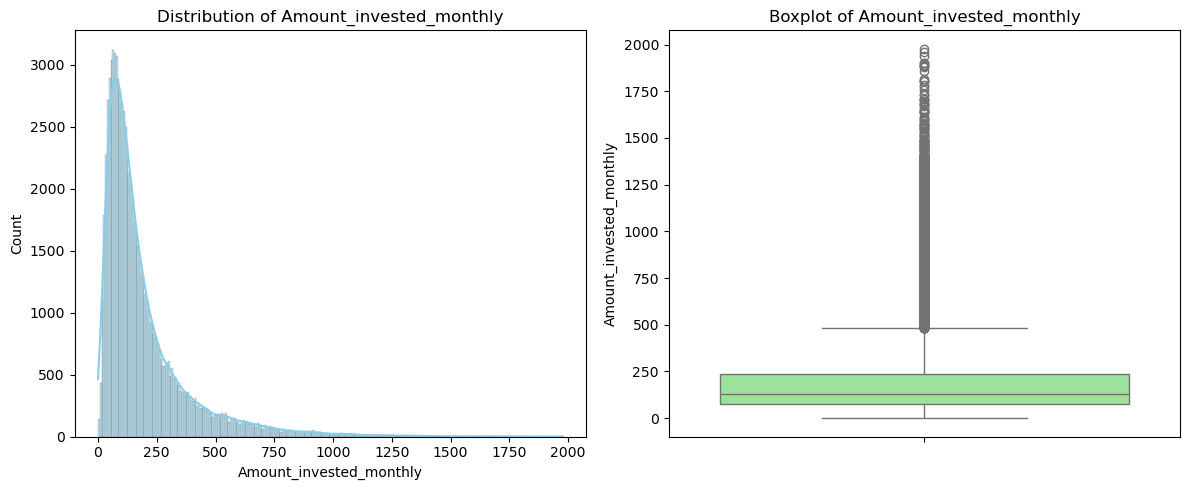

In [351]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
num_cols = train_df.select_dtypes(include='number').columns

# 1. Summary statistics
print("Summary Statistics for Numerical Variables:")
print(train_df[num_cols].describe().T)

# 2. Histograms + Boxplots
for col in num_cols:
    plt.figure(figsize=(12, 5))

    # Histogram + KDE on left
    plt.subplot(1, 2, 1)
    sns.histplot(train_df[col].dropna(), kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)

    # Boxplot on right
    plt.subplot(1, 2, 2)
    sns.boxplot(y=train_df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()


C:\Users\Hiruni\AppData\Local\Temp\ipykernel_8964\2844386605.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=train_df, x=target, y=col, order=target_order, palette='Set2')
C:\Users\Hiruni\AppData\Local\Temp\ipykernel_8964\2844386605.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = train_df.groupby(target)[col].median()


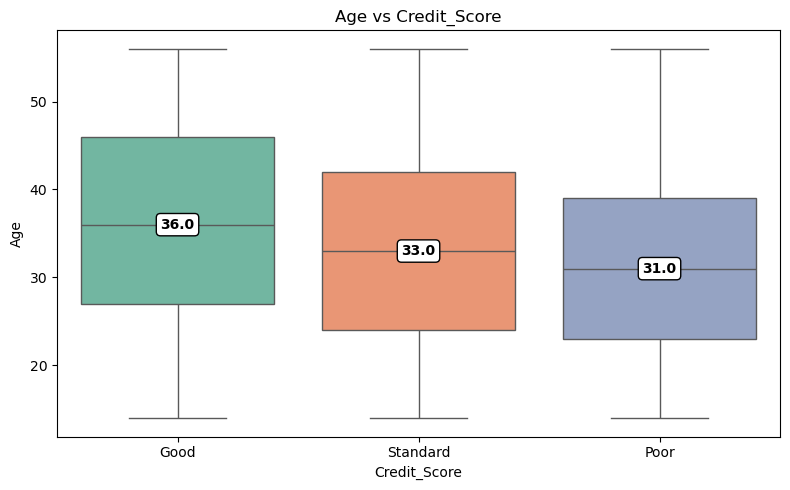

C:\Users\Hiruni\AppData\Local\Temp\ipykernel_8964\2844386605.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=train_df, x=target, y=col, order=target_order, palette='Set2')
C:\Users\Hiruni\AppData\Local\Temp\ipykernel_8964\2844386605.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = train_df.groupby(target)[col].median()


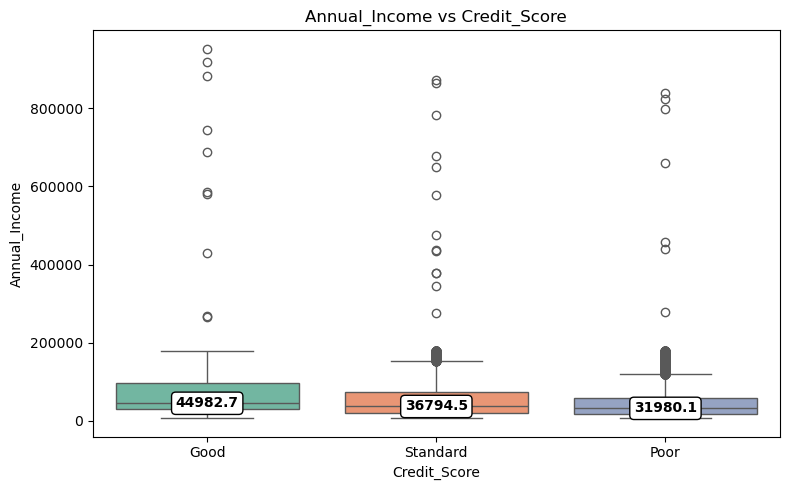

C:\Users\Hiruni\AppData\Local\Temp\ipykernel_8964\2844386605.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=train_df, x=target, y=col, order=target_order, palette='Set2')
C:\Users\Hiruni\AppData\Local\Temp\ipykernel_8964\2844386605.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = train_df.groupby(target)[col].median()


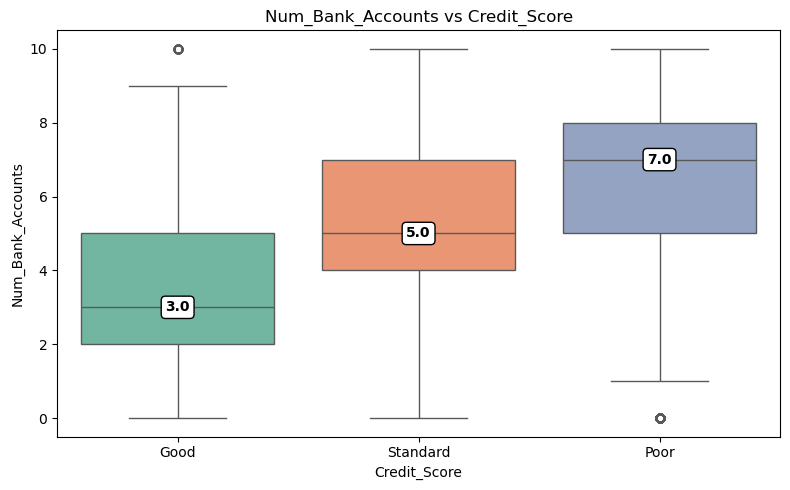

C:\Users\Hiruni\AppData\Local\Temp\ipykernel_8964\2844386605.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=train_df, x=target, y=col, order=target_order, palette='Set2')
C:\Users\Hiruni\AppData\Local\Temp\ipykernel_8964\2844386605.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = train_df.groupby(target)[col].median()


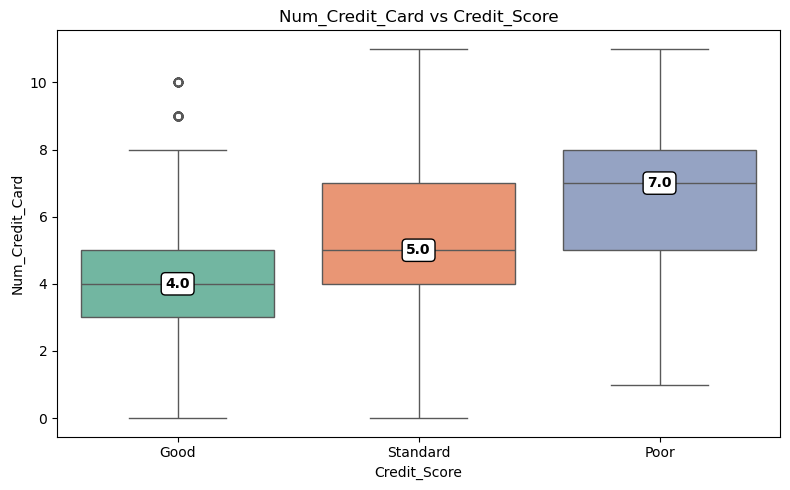

C:\Users\Hiruni\AppData\Local\Temp\ipykernel_8964\2844386605.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=train_df, x=target, y=col, order=target_order, palette='Set2')
C:\Users\Hiruni\AppData\Local\Temp\ipykernel_8964\2844386605.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = train_df.groupby(target)[col].median()


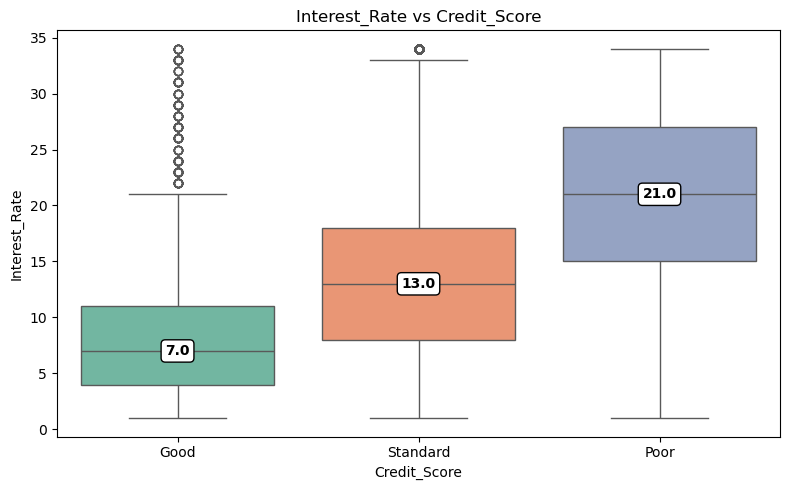

C:\Users\Hiruni\AppData\Local\Temp\ipykernel_8964\2844386605.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=train_df, x=target, y=col, order=target_order, palette='Set2')
C:\Users\Hiruni\AppData\Local\Temp\ipykernel_8964\2844386605.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = train_df.groupby(target)[col].median()


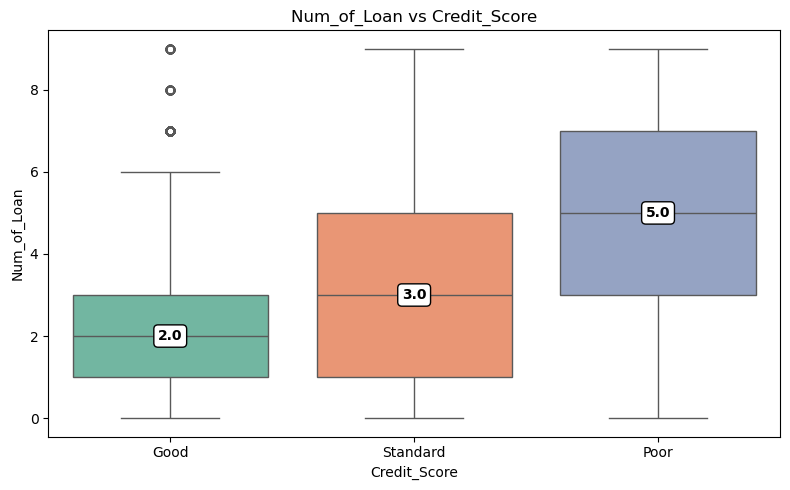

C:\Users\Hiruni\AppData\Local\Temp\ipykernel_8964\2844386605.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=train_df, x=target, y=col, order=target_order, palette='Set2')
C:\Users\Hiruni\AppData\Local\Temp\ipykernel_8964\2844386605.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = train_df.groupby(target)[col].median()


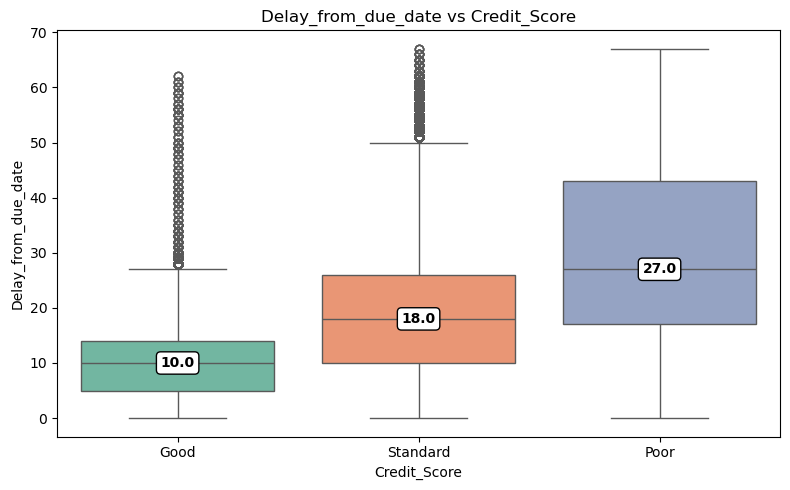

C:\Users\Hiruni\AppData\Local\Temp\ipykernel_8964\2844386605.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=train_df, x=target, y=col, order=target_order, palette='Set2')
C:\Users\Hiruni\AppData\Local\Temp\ipykernel_8964\2844386605.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = train_df.groupby(target)[col].median()


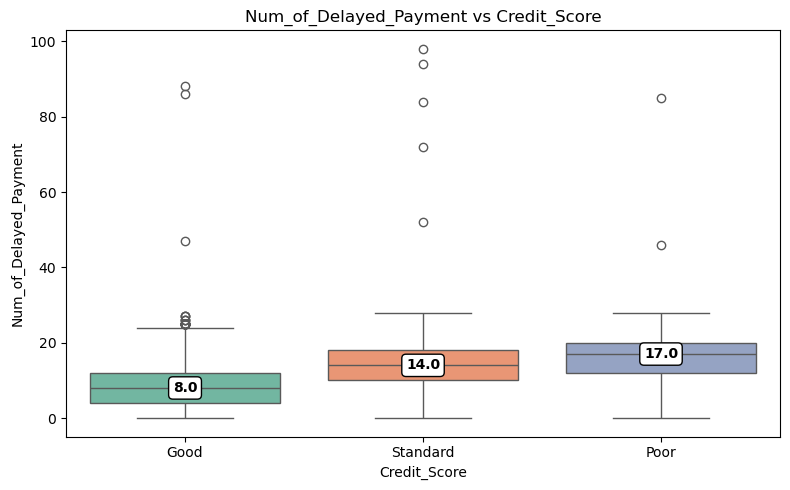

C:\Users\Hiruni\AppData\Local\Temp\ipykernel_8964\2844386605.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=train_df, x=target, y=col, order=target_order, palette='Set2')
C:\Users\Hiruni\AppData\Local\Temp\ipykernel_8964\2844386605.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = train_df.groupby(target)[col].median()


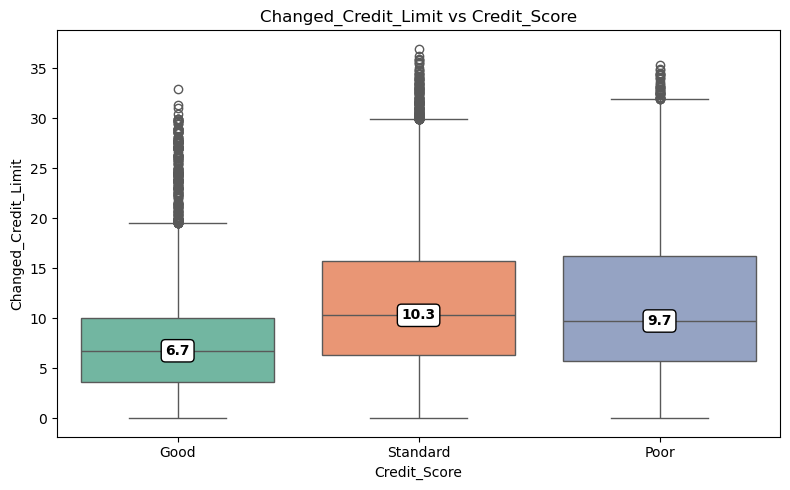

C:\Users\Hiruni\AppData\Local\Temp\ipykernel_8964\2844386605.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=train_df, x=target, y=col, order=target_order, palette='Set2')
C:\Users\Hiruni\AppData\Local\Temp\ipykernel_8964\2844386605.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = train_df.groupby(target)[col].median()


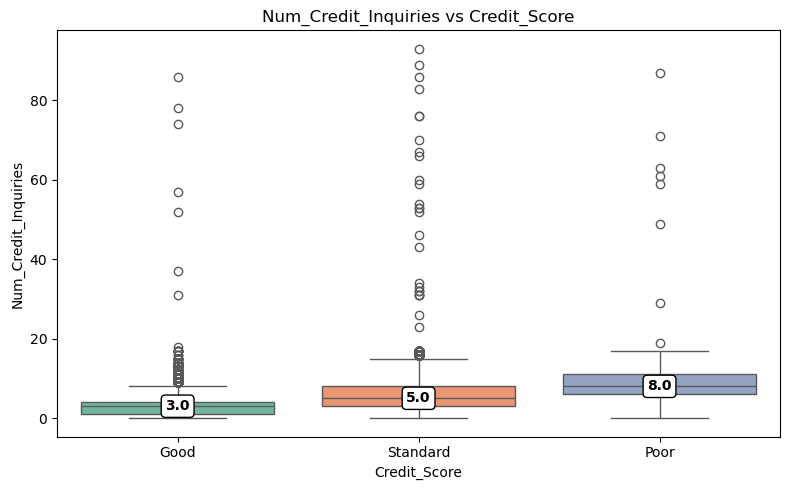

C:\Users\Hiruni\AppData\Local\Temp\ipykernel_8964\2844386605.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=train_df, x=target, y=col, order=target_order, palette='Set2')
C:\Users\Hiruni\AppData\Local\Temp\ipykernel_8964\2844386605.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = train_df.groupby(target)[col].median()


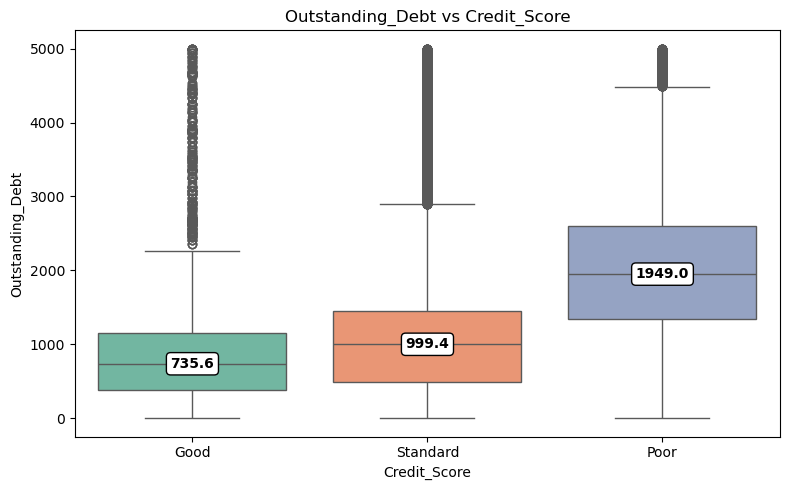

C:\Users\Hiruni\AppData\Local\Temp\ipykernel_8964\2844386605.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=train_df, x=target, y=col, order=target_order, palette='Set2')
C:\Users\Hiruni\AppData\Local\Temp\ipykernel_8964\2844386605.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = train_df.groupby(target)[col].median()


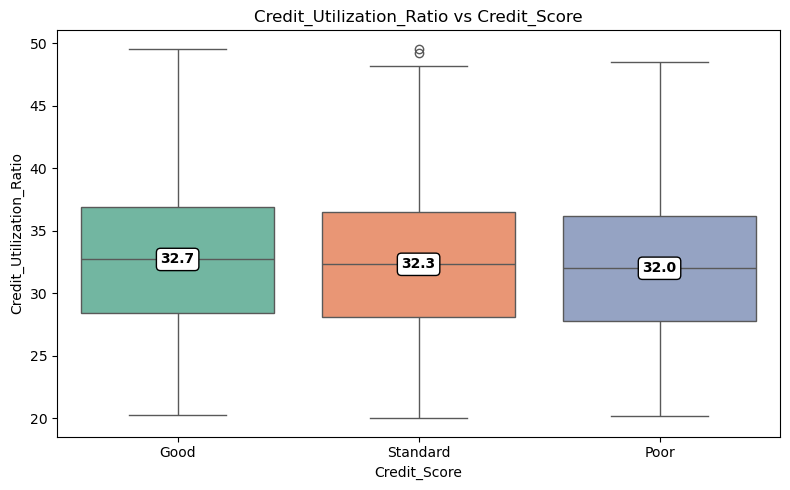

C:\Users\Hiruni\AppData\Local\Temp\ipykernel_8964\2844386605.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=train_df, x=target, y=col, order=target_order, palette='Set2')
C:\Users\Hiruni\AppData\Local\Temp\ipykernel_8964\2844386605.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = train_df.groupby(target)[col].median()


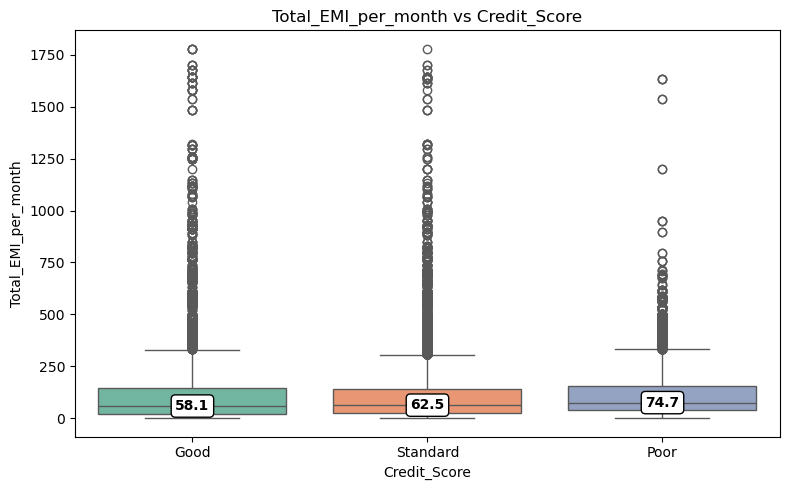

C:\Users\Hiruni\AppData\Local\Temp\ipykernel_8964\2844386605.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=train_df, x=target, y=col, order=target_order, palette='Set2')
C:\Users\Hiruni\AppData\Local\Temp\ipykernel_8964\2844386605.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = train_df.groupby(target)[col].median()


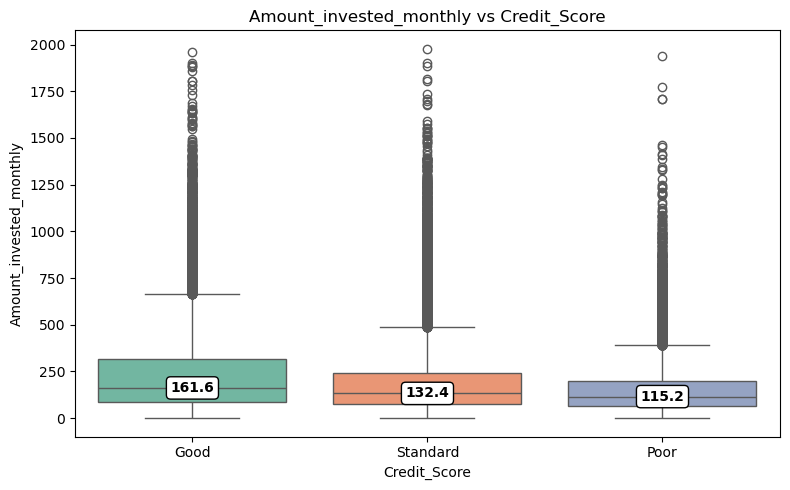

In [352]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set your target variable and its order
target = 'Credit_Score'
target_order = ['Good', 'Standard', 'Poor']
train_df[target] = pd.Categorical(train_df[target], categories=target_order, ordered=True)

# Get all numeric columns
num_cols = train_df.select_dtypes(include='number').columns

# Plot boxplots with median labels
for col in num_cols:
    plt.figure(figsize=(8, 5))
    ax = sns.boxplot(data=train_df, x=target, y=col, order=target_order, palette='Set2')

    # Compute and annotate medians
    medians = train_df.groupby(target)[col].median()
    for i, category in enumerate(target_order):
        median_val = medians[category]
        ax.text(i, median_val, f'{median_val:.1f}', 
                ha='center', va='center', color='black', fontsize=10, fontweight='bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    plt.title(f'{col} vs {target}')
    plt.xlabel(target)
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


In [353]:
pip install prince


In [354]:
import pandas as pd
import prince

features = train_df.drop(columns=['Credit_Score'])


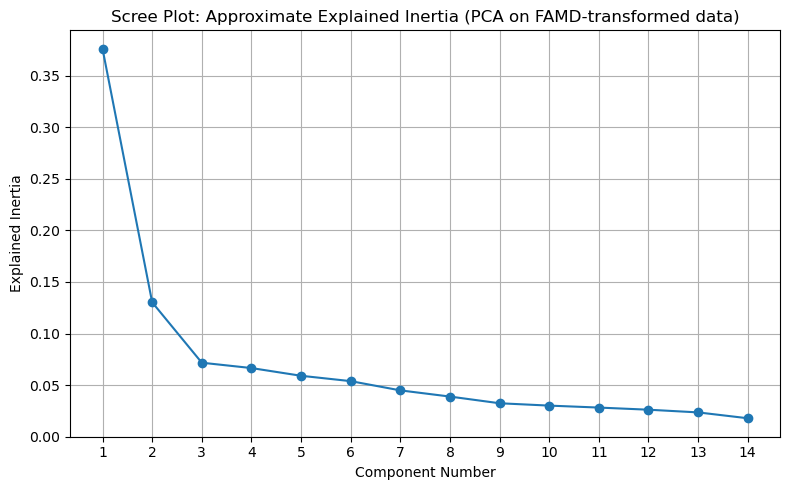

In [355]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Prepare the data (replace this with your actual 'features' DataFrame)
df = features.copy()
cat_cols = df.select_dtypes(include='category').columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 2. Define preprocessing
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(drop='first'), cat_cols)
])

# 3. Transform data
X_transformed = preprocessor.fit_transform(df)

# 4. Apply PCA (as proxy for FAMD after preprocessing)
pca = PCA(n_components=min(X_transformed.shape[0], X_transformed.shape[1]))
X_pca = pca.fit_transform(X_transformed)

# 5. Explained variance (inertia)
explained_inertia = pca.explained_variance_ratio_

# 6. Plot the scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_inertia) + 1), explained_inertia, marker='o', linestyle='-')
plt.title('Scree Plot: Approximate Explained Inertia (PCA on FAMD-transformed data)')
plt.xlabel('Component Number')
plt.ylabel('Explained Inertia')
plt.xticks(range(1, len(explained_inertia) + 1))
plt.grid(True)
plt.tight_layout()
plt.show()


In [356]:
X_reduced = X_pca[:, :3]



In [357]:
df_pca = pd.DataFrame(X_reduced, columns=['PC1', 'PC2', 'PC3'])


In [358]:
df_pca

,PC1,PC2,PC3
0,-2.047419,2.087802,0.000515
1,-1.993439,1.725207,1.128900
2,-4.284017,2.552896,0.921916
3,-0.929379,-0.261107,-0.593817
4,3.101847,0.486096,-0.061349
...,...,...,...
79995,-1.146610,1.595798,-1.218204
79996,3.946372,-0.847759,-1.269109
79997,2.943476,-0.002720,-1.210906
79998,-1.133908,1.980800,0.181141


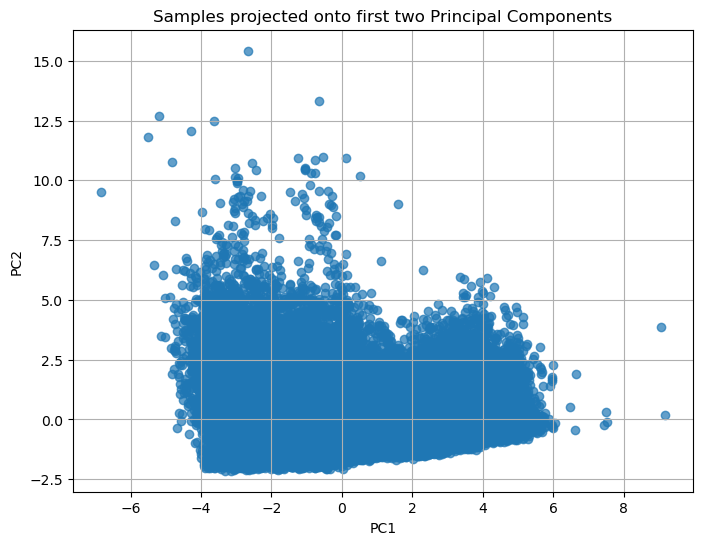

In [367]:
plt.figure(figsize=(8,6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.7)
plt.title('Samples projected onto first two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()


In [372]:
variance_explained_3pcs = explained_inertia[:3].sum()
print(f"Total variance explained by first 3 PCs: {variance_explained_3pcs:.4f} ({variance_explained_3pcs*100:.2f}%)")


Total variance explained by first 3 PCs: 0.5781 (57.81%)


In [ ]:
##Half of the variance captured by 3 pcs. But its not enough
##lets try to make clusters but not ideal with 60% variance

Silhouette score for k=2: 0.4416
Silhouette score for k=3: 0.3747
Silhouette score for k=4: 0.2993
Silhouette score for k=5: 0.2757
Silhouette score for k=6: 0.2557
Silhouette score for k=7: 0.2569
Silhouette score for k=8: 0.2628
Silhouette score for k=9: 0.2635


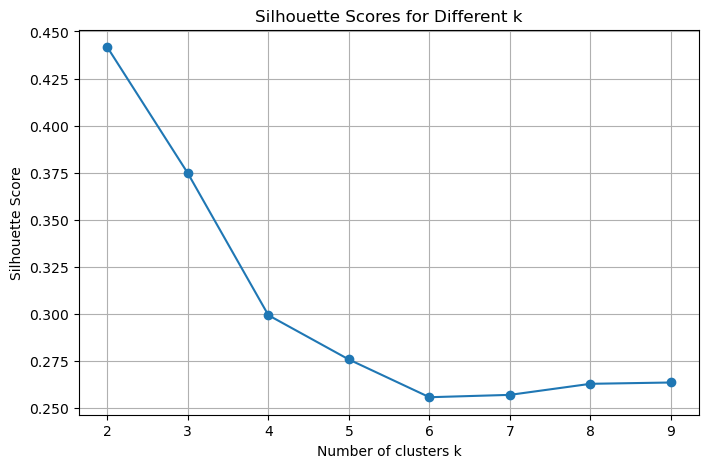

In [374]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Use your reduced data: X_reduced with 3 PCs
X_reduced = X_pca[:, :3]

# Try a range of clusters and compute silhouette scores
silhouette_scores = []
K = range(2, 10)  # test cluster numbers from 2 to 9

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_reduced)
    score = silhouette_score(X_reduced, labels)
    silhouette_scores.append(score)
    print(f"Silhouette score for k={k}: {score:.4f}")

# Plot silhouette scores to find the best k
plt.figure(figsize=(8,5))
plt.plot(K, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [ ]:
# Fit KMeans with chosen k (say k=3)
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X_reduced)

# 2D scatter plot of PC1 vs PC2 colored by cluster
plt.figure(figsize=(8,6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='Set1', alpha=0.7)
plt.title('Clusters on first two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_reduced[:,0], X_reduced[:,1], X_reduced[:,2], c=labels, cmap='Set1', alpha=0.7)
ax.set_title('3D Clusters on first three PCs')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
fig.colorbar(scatter, label='Cluster')
plt.show()


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Fit KMeans with chosen k (e.g., 2)
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X_reduced[:, :2])  # use only first 2 PCs for 2D plot

# Create mesh grid for decision boundary
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict cluster label for each point in the mesh
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.2, cmap='Set1')

# Plot the original points
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='Set1', s=50, alpha=0.7, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroids')

plt.title('KMeans Clustering with Decision Boundaries (PC1 vs PC2)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
